# Investigating the Robberto 2020 tables in the ONC

This Robberto et al. 2020 paper looks like it's as much a boon to "picking out all the brown dwarfs" as Tom Megeath's 2012 paper was to "distinguishing SED classes". Which is dope.

[This one.](https://ui.adsabs.harvard.edu/abs/2020ApJ...896...79R/abstract)

In [112]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [5]:
location = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/ONC"

In [43]:
filepath_table2 = os.path.join(location, "Robberto_2020_Table2_apjab911et2_mrt.txt")
filepath_table4 = os.path.join(location, "Robberto_2020_Table4_apjab911et4_mrt.txt")

robb_table2 = astropy.table.Table.read(filepath_table2, format='ascii')[:-1]
robb_table4 = astropy.table.Table.read(filepath_table4, format='ascii')


In [44]:
import datetime
start = datetime.datetime.now()
robb_table2
# time_elapsed = datetime.datetime.now() - start
# print(time_elapsed)

<Table length=4504>
index   RAdeg     DEdeg     Xpix     Ypix  ... e_mag139  color  e_color  Ndet
         deg       deg      pix      pix   ...   mag      mag     mag        
int64  float64   float64  float64  float64 ... float64  float64 float64 int64
----- --------- --------- -------- ------- ... -------- ------- ------- -----
    1 83.626381 -5.457797 10112.94 7947.76 ...      0.2   -0.08    0.12     3
    2 83.608998 -5.441777 10598.81 8397.33 ...     0.03    0.24    0.02     4
    3 83.616348 -5.442953 10393.41 8364.36 ...     0.02     0.2    0.01     2
    4 83.632944 -5.443575  9929.65 8347.02 ...     0.01    0.03    0.02     2
    5  83.61754 -5.444363 10360.07 8324.79 ...     0.02   -0.05    0.02     2
    6 83.600199 -5.440295 10844.69 8438.86 ...     0.01    0.48     0.0     4
    7 83.624958 -5.421466 10152.94 8967.55 ...     0.01   -0.09    0.02     3
    8 83.622401 -5.431073 10224.34 8697.87 ...      0.0   -0.08    0.01     2
    9 83.642761 -5.443064  9655.32 8361.41 ...     0.01    0.21    0.02     2
  ...       ...       ...      ...     ... ...      ...     ...     ...   ...
 4495  83.93888 -5.698197  1382.73 1199.39 ...     0.02   -0.37    0.81     1
 4496  83.92348 -5.695984  1812.87 1261.63 ...     0.01   -0.09    0.09     1
 4497 83.926468 -5.689335  1729.35 1448.23 ...     0.01    0.46    0.03     1
 4498 83.923836 -5.699542  1802.94 1161.76 ...     0.01    0.31    0.42     1
 4499  83.92184 -5.695223  1858.67 1283.01 ...     0.07   -0.25    0.12     1
 4500 83.923217 -5.694496  1820.19 1303.39 ...     0.04    0.21    0.12     1
 4501 83.948678 -5.651471  1108.65 2510.93 ...     0.02    0.22    0.02     1
 4502 83.950561 -5.652073  1056.06  2494.0 ...     0.01    0.19    0.03     1
 4503 83.942661 -5.658432  1276.78 2315.57 ...     0.01    0.16    0.03     1
 4504 83.945048 -5.656459  1210.09 2370.95 ...     0.01    0.21    0.01     1

In [45]:
robb_table4

<Table length=1682>
index log(BF)   Mstar   Teff    Av  
      dex(---)   Msun    K     mag  
int64 float64  float64 int64 float64
----- -------- ------- ----- -------
    1      2.0    0.91  3757   -3.62
    3      2.0    0.81  3678     3.3
    4      2.0    0.28  3266    0.12
    5      2.0    0.14  3084    1.72
    7      2.0    0.13  3069    0.87
    8      2.0    0.11  3031    2.13
   10     0.84    0.01  2063   -1.69
   14      0.5    0.01  2203    8.82
   25      2.0    1.05  3843    0.85
  ...      ...     ...   ...     ...
 4431      2.0    0.28  3266    -1.1
 4432      2.0    0.23  3220    1.89
 4433      2.0    0.17  3157     2.5
 4434      2.0    0.07  2840    1.62
 4452     0.55    0.01  2388   13.18
 4463      2.0    0.37  3331    1.45
 4464     0.36    0.17  3151    7.16
 4465     0.83    0.08  2850    3.41
 4484      2.0    0.39  3350    3.91
 4495      2.0    0.03  2590   13.63

In [8]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("Numpy", numpy.__version__)
import astropy; print("astropy", astropy.__version__)
import scipy; print("Scipy", scipy.__version__)
import matplotlib; print("Matplotlib", matplotlib.__version__)


Darwin-19.6.0-x86_64-i386-64bit
Python 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy 1.20.2
astropy 4.2.1
Scipy 1.6.2
Matplotlib 3.3.4


In [48]:
joined = astropy.table.join(robb_table2, robb_table4)

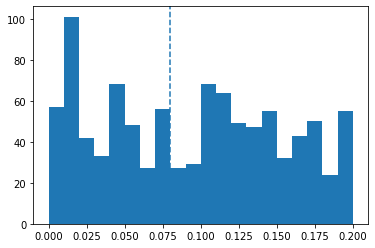

In [68]:
plt.hist(joined['Mstar'], range=(0,0.2), bins=20)
plt.axvline(0.08, linestyle='--')

In [74]:


bds = (joined['Mstar'] < 0.08)
print(np.sum(bds))



432


344


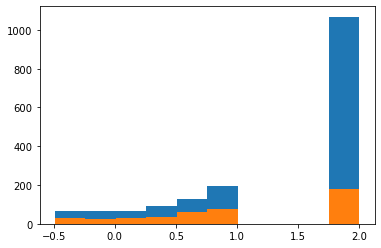

In [88]:
# confident_bds = (joined['Mstar'] < 0.08) & joined['B']

plt.hist(joined['log(BF)'])
plt.hist(joined['log(BF)'][bds])

confident_bds = (joined['Mstar'] < 0.08) & (joined['log(BF)'] > np.log10(2))
print(np.sum(confident_bds))

In [106]:
confidence_levels = [.8, .85, .9, .95, 0.99]

for conf in confidence_levels:
    top = conf
    bottom = 1 - conf
    bf = top / bottom

    confident_bds = (joined['Mstar'] < 0.08) & (joined['log(BF)'] >= np.log10(bf))
    print(f"{conf*100}% | BF = {bf:5.2f} (logbf = {np.log10(bf):.2f}): {np.sum(confident_bds)} BDs")

80.0% | BF =  4.00 (logbf = 0.60): 289 BDs
85.0% | BF =  5.67 (logbf = 0.75): 254 BDs
90.0% | BF =  9.00 (logbf = 0.95): 199 BDs
95.0% | BF = 19.00 (logbf = 1.28): 177 BDs
99.0% | BF = 99.00 (logbf = 2.00): 177 BDs


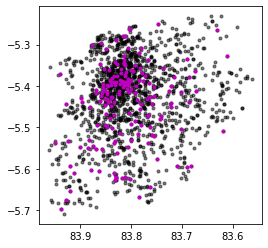

In [108]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(joined['RAdeg'], joined['DEdeg'], 'k.', alpha=0.5)
ax.plot(joined['RAdeg'][confident_bds], joined['DEdeg'][confident_bds], 'm.')
ax.invert_xaxis()

Text(0, 0.5, 'Mass (Msun)')

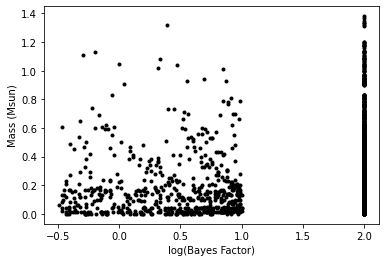

In [81]:
plt.plot(joined['log(BF)'], joined['Mstar'], 'k.')
plt.xlabel("log(Bayes Factor)")
plt.ylabel("Mass (Msun)")

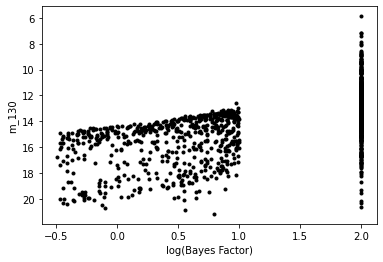

In [86]:
# Tom is currently investigating the meaning of this Bayes factor.

plt.plot(joined['log(BF)'], joined['mag130'], 'k.')
plt.xlabel("log(Bayes Factor)")
plt.ylabel("m_130")
plt.gca().invert_yaxis()

In [107]:
joined[confident_bds]



<Table length=177>
index   RAdeg     DEdeg     Xpix    Ypix  ... log(BF)   Mstar   Teff    Av  
         deg       deg      pix     pix   ... dex(---)   Msun    K     mag  
int64  float64   float64  float64 float64 ... float64  float64 int64 float64
----- --------- --------- ------- ------- ... -------- ------- ----- -------
   60 83.686833 -5.439412 8423.81 8464.13 ...      2.0    0.02  2470    0.34
  129 83.672223 -5.412329 8832.18  9224.3 ...      2.0    0.01  2380    -0.8
  154 83.721278 -5.449853 7461.26 8171.16 ...      2.0    0.04  2749    2.09
  157 83.741072 -5.472437  6908.1 7537.25 ...      2.0    0.02  2430    1.22
  215 83.721129 -5.441005 7465.44 8419.52 ...      2.0    0.04  2740   -2.19
  249 83.804955 -5.464667 5123.07 7755.33 ...      2.0    0.07  2854   -1.41
  251 83.793104 -5.484315 5454.24 7203.81 ...      2.0    0.06  2826    2.17
  252 83.766315 -5.469061 6202.78 7632.01 ...      2.0    0.04  2754    0.65
  253 83.766846 -5.472368 6187.94  7539.2 ...      2.0    0.05  2763    1.79
  ...       ...       ...     ...     ... ...      ...     ...   ...     ...
 4136 83.832521 -5.628103 4353.31 3167.58 ...      2.0    0.05  2768    1.76
 4138 83.817817 -5.623133 4764.07 3307.14 ...      2.0    0.04  2738    1.39
 4139 83.830642 -5.620551 4405.76 3379.57 ...      2.0    0.03  2648    0.26
 4251 83.921315 -5.654694 1873.04 2420.69 ...      2.0    0.02  2442     1.4
 4280 83.762515 -5.644598 6308.93 2704.67 ...      2.0    0.07  2841     2.0
 4286 83.783684 -5.667871  5717.6 2051.36 ...      2.0    0.02  2474    -1.3
 4326 83.802899 -5.624724 5180.79 3262.51 ...      2.0    0.07  2847    0.53
 4339 83.811772 -5.619761 4932.93  3401.8 ...      2.0    0.01  2341    4.98
 4434 83.927963 -5.676457 1687.49 1809.72 ...      2.0    0.07  2840    1.62
 4495  83.93888 -5.698197 1382.73 1199.39 ...      2.0    0.03  2590   13.63

In [121]:
table_coordinates = SkyCoord(ra=joined['RAdeg'][confident_bds], dec=joined['DEdeg'][confident_bds])
len(table_coordinates)

177

In [109]:
# ok, now let's try loading up the photometry & the spreadsheet.

In [169]:
from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc

spread = spreadsheet.load_wserv_v2(5)
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(5))


Loading WSERV5 photometry data... DONE (elapsed time: 0.32s)


In [113]:
w5m = spread['median']
spreadsheet_coordinates = SkyCoord(ra=w5m['RA'].values*u.rad, dec=w5m['DEC'].values*u.rad)


[16821 16889 16624 16443 16563 16060 16259 16406 16147 16327 17514 16168
 16150  6709 15883  6648  6837  7177 16021 15737  6886 17302  6811  7228
 17232 16710 16285 16258 16108 16051 15679 15658 15704  7160  7063  7251
  7173  7167  7397  6474  6437  6398  6327  7715 17320  6378  6375 27961
  6312  8033  6336 27989 28068 17557 17793 16249 15727  6311 17446 16525
 16542 17573 18108 18026 16709 18031 26675 18336 18245 18499 18264 18243
 18377 18175 18154 18318 19643 18562 18549 18117 19706 18055 18527 20484
 18595 20328 18443 20415 20458 28768 18899 28139 28122 18985 18924 18931
 19100 19089 19079  7481  7556  7186 15935 16349 16661 16823  7515  7526
 15661 15700 15672 15805 15685 30105 25113 24988 15977 30280 30385]
119
119


Text(0, 0.5, 'Number')

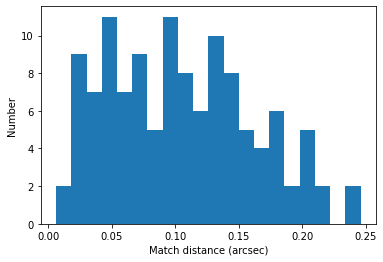

In [151]:
idx, d2d, d3d = table_coordinates.match_to_catalog_sky(spreadsheet_coordinates)
max_sep = 0.5 * u.arcsec
sep_constraint = (d2d < max_sep)
print(idx[sep_constraint])
print(len(idx[sep_constraint]))
print(np.sum(sep_constraint))

plt.hist(d2d[sep_constraint].to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

In [168]:
matches = w5m.iloc[idx[sep_constraint]]
matches['Teff'] = joined[confident_bds][sep_constraint]['Teff']
matches['Robberto_index'] = joined[confident_bds][sep_constraint]['index']

matched_bds = joined[confident_bds][sep_constraint]

matches

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MEANMJDOBS        RA       DEC    JMHPNT  JMHPNTERR  \
SOURCEID                                                                
44199508514290  54128.326777  1.460611 -0.094936  0.504096   0.030071   
44199508514489  54124.224208  1.460356 -0.094463  0.567246   0.036372   
44199508513812  54128.326777  1.461212 -0.095118  0.559698   0.025480   
44199508513339  54130.246823  1.461558 -0.095513  0.657735   0.041495   
44199508513687  54127.830160  1.461209 -0.094963  0.551928   0.022238   
...                      ...       ...       ...       ...        ...   
44199508544310  54125.824853  1.461931 -0.098517  0.506424   0.022146   
44199508543835  54125.824853  1.462300 -0.098924  0.562343   0.026177   
44199508512349  54128.326777  1.462636 -0.098170  0.710038   0.021968   
44199508565550  54119.382990  1.464819 -0.099074  0.540185   0.022366   
44199508565969  54117.416140  1.465010 -0.099453       NaN        NaN   

                  HMKPNT  HMKPNTERR  JAPERMAG3  JAPERMAG3ERR  HAPERMAG3  ...  \
SOURCEID                                                                 ...   
44199508514290  0.490642   0.030502  16.319401      0.017650  15.814105  ...   
44199508514489  0.544541   0.035562  16.583115      0.022668  16.012238  ...   
44199508513812  0.503921   0.025048  15.781231      0.014388  15.223330  ...   
44199508513339  0.652925   0.036150  16.870314      0.026973  16.198334  ...   
44199508513687  0.501052   0.022006  14.748690      0.011416  14.195631  ...   
...                  ...        ...        ...           ...        ...  ...   
44199508544310  0.354748   0.022082  14.755178      0.011323  14.246307  ...   
44199508543835  0.552432   0.025725  16.029867      0.014958  15.462873  ...   
44199508512349  0.580051   0.021668  14.611141      0.011214  13.906094  ...   
44199508565550  0.362074   0.022396  14.957703      0.011521  14.415291  ...   
44199508565969  0.822243   0.418295        NaN           NaN  19.335573  ...   

                JPPERRBITS  HPPERRBITS  KPPERRBITS  MERGEDCLASS     PSTAR  \
SOURCEID                                                                    
44199508514290         0.0         0.0         0.0         -1.0  0.999657   
44199508514489         0.0         0.0         0.0         -1.0  0.993865   
44199508513812         0.0         0.0         0.0         -1.0  0.999657   
44199508513339         0.0         0.0        16.0          1.0  0.008563   
44199508513687         0.0         0.0         0.0         -1.0  0.999657   
...                    ...         ...         ...          ...       ...   
44199508544310         0.0         0.0         0.0         -1.0  0.999657   
44199508543835         0.0         0.0         0.0         -1.0  0.999657   
44199508512349         0.0         0.0         0.0         -1.0  0.999657   
44199508565550         0.0         0.0         0.0         -1.0  0.999657   
44199508565969         NaN         0.0         0.0         -1.0  0.900000   

                  JGRADE    HGRADE    KGRADE  Teff  Robberto_index  
SOURCEID                                                            
44199508514290  0.957784  0.967078  0.966216  2470              60  
44199508514489  0.945731  0.967248  0.965291  2380             129  
44199508513812  0.957784  0.967078  0.966216  2749             154  
44199508513339  0.960317  0.971370  0.967066  2430             157  
44199508513687  0.956582  0.966121  0.965291  2740             215  
...                  ...       ...       ...   ...             ...  
44199508544310  0.962611  0.973869  0.958797  2841            4280  
44199508543835  0.962611  0.973869  0.958797  2474            4286  
44199508512349  0.955381  0.965164  0.964365  2847            4326  
44199508565550  0.935897  0.973430  0.976562  2840            4434  
44199508565969  0.977419  0.985981  0.986254  2590            4495  

[119 rows x 23 columns]

Text(0.5, 1.0, '119 brown dwarfs from Robberto+2020\ncross-matched to our JHK data')

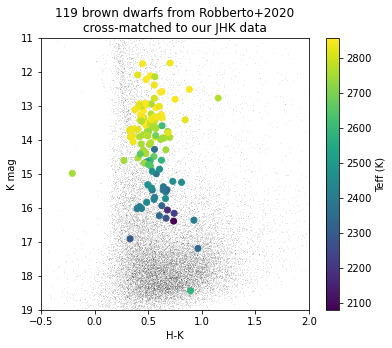

In [159]:
fig, ax = plt.subplots(1, figsize=(6,5))

plt.plot(w5m['HAPERMAG3'] - w5m['KAPERMAG3'], w5m['KAPERMAG3'], 'k,', zorder=-1, alpha=0.1)
plt.scatter(matches['HAPERMAG3'] - matches['KAPERMAG3'], matches['KAPERMAG3'], c=matches['Teff'], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label("Teff (K)")
plt.gca().invert_yaxis()
plt.xlabel("H-K")
plt.ylabel("K mag")
plt.xlim(-0.5, 2)
plt.ylim(19, 11)
plt.title(f"{np.sum(sep_constraint)} brown dwarfs from Robberto+2020\ncross-matched to our JHK data")

Text(0.5, 1.0, '119 brown dwarfs from Robberto+2020\ncross-matched to our JHK data')

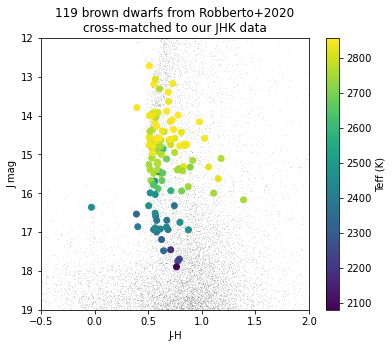

In [164]:
fig, ax = plt.subplots(1, figsize=(6,5))

plt.plot(w5m['JAPERMAG3'] - w5m['HAPERMAG3'], w5m['JAPERMAG3'], 'k,', zorder=-1, alpha=0.1)
plt.scatter(matches['JAPERMAG3'] - matches['HAPERMAG3'], matches['JAPERMAG3'], c=matches['Teff'], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label("Teff (K)")
plt.gca().invert_yaxis()
plt.xlabel("J-H")
plt.ylabel("J mag")
plt.xlim(-0.5, 2)
plt.ylim(19, 12)
plt.title(f"{np.sum(sep_constraint)} brown dwarfs from Robberto+2020\ncross-matched to our JHK data")

Text(0, 0.5, 'F139M mag (Robberto)')

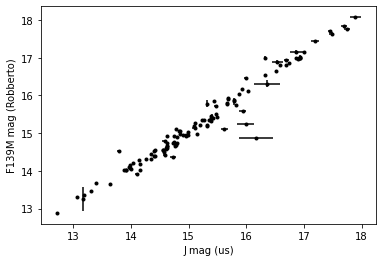

In [165]:
plt.errorbar(
    matches['JAPERMAG3'], 
    matched_bds['mag139'], 
    xerr=matches['JAPERMAG3ERR'], 
    yerr=matched_bds['e_mag139'], 
    fmt='k.')

plt.xlabel("J mag (us)")
plt.ylabel("F139M mag (Robberto)")


0 Robberto index #60 is 44199508514290.
 Match: 0.04 arcsec
 Published mags: F139M=16.5
 Measured mags:  J=16.3, K=15.3
 Stetson variability index:  S=0.61
 


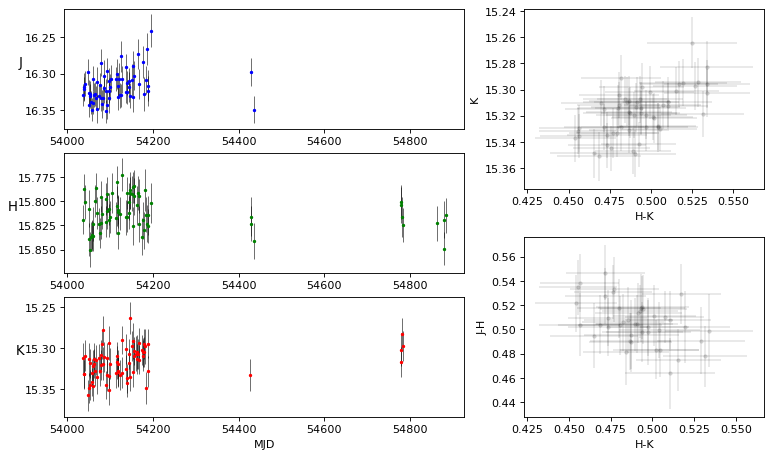

1 Robberto index #129 is 44199508514489.
 Match: 0.11 arcsec
 Published mags: F139M=16.8
 Measured mags:  J=16.6, K=15.5
 Stetson variability index:  S=1.62
 


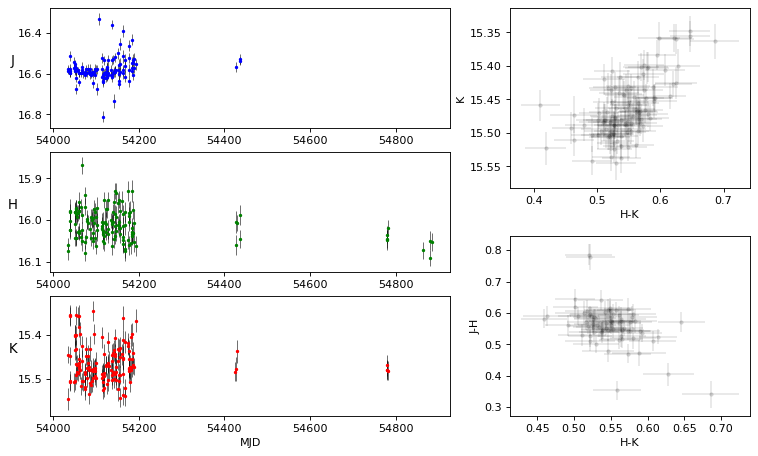

2 Robberto index #154 is 44199508513812.
 Match: 0.03 arcsec
 Published mags: F139M=15.8
 Measured mags:  J=15.8, K=14.7
 Stetson variability index:  S=0.75
 


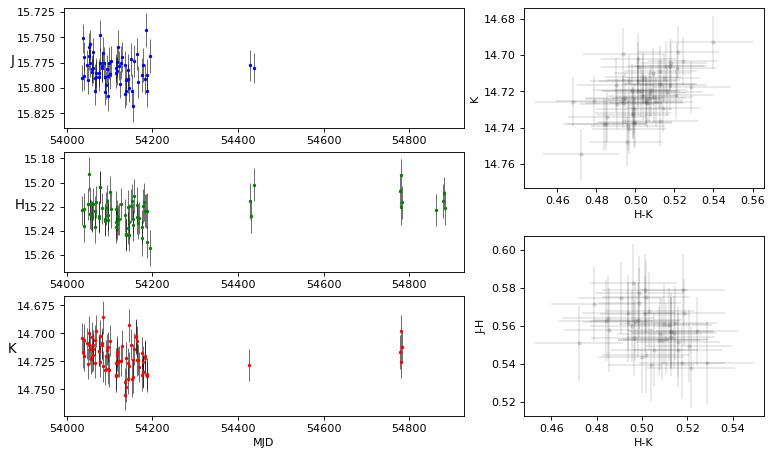

3 Robberto index #157 is 44199508513339.
 Match: 0.21 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=15.5
 Stetson variability index:  S=-0.31
 


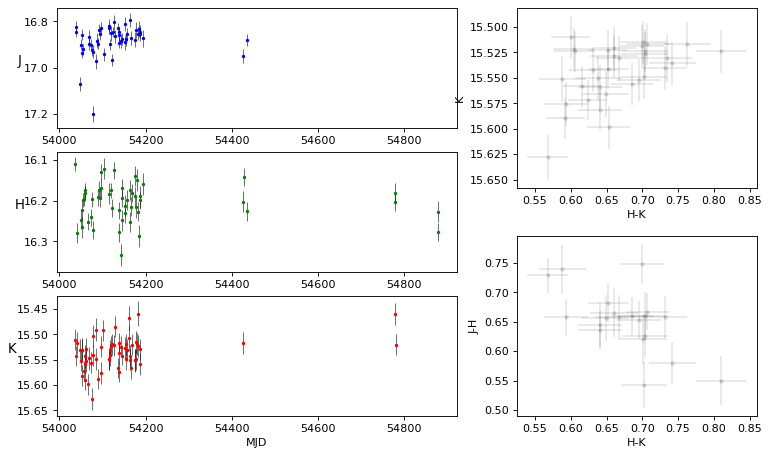

4 Robberto index #215 is 44199508513687.
 Match: 0.03 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=14.7, K=13.7
 Stetson variability index:  S=1.69
 


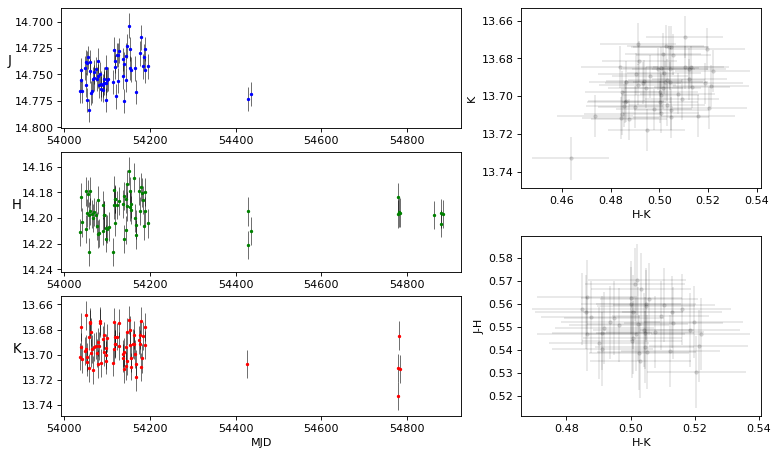

5 Robberto index #251 is 44199508512516.
 Match: 0.09 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=15.3, K=13.4
 Stetson variability index:  S=2.53
 


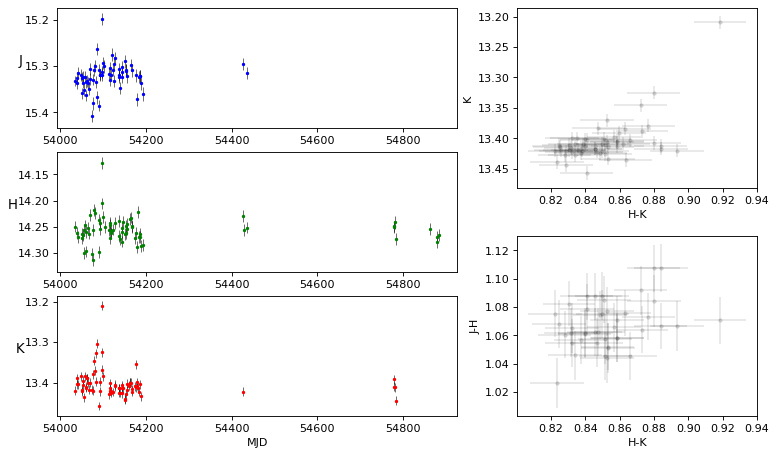

6 Robberto index #252 is 44199508512929.
 Match: 0.10 arcsec
 Published mags: F139M=15.3
 Measured mags:  J=15.4, K=13.9
 Stetson variability index:  S=6.78
 


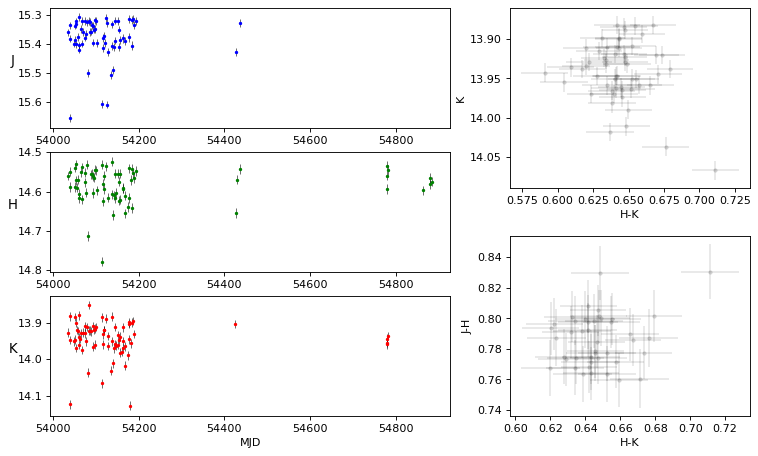

7 Robberto index #279 is 44199508513256.
 Match: 0.24 arcsec
 Published mags: F139M=15.8
 Measured mags:  J=15.3, K=13.8
 Stetson variability index:  S=41.50
 


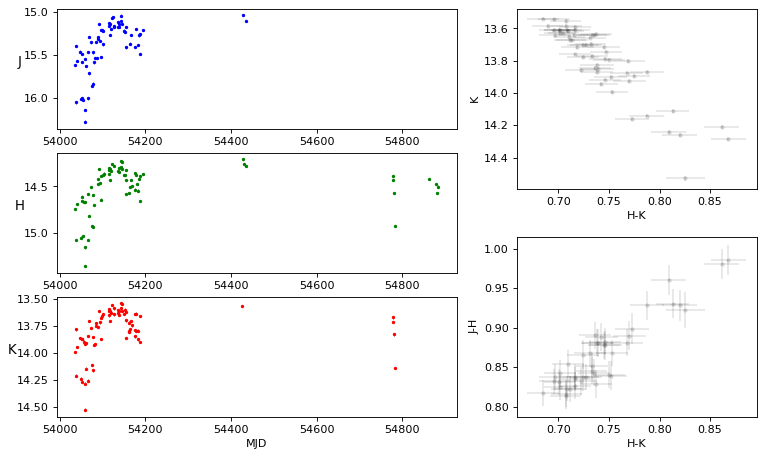

8 Robberto index #299 is 44199508512724.
 Match: 0.13 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=14.8, K=13.7
 Stetson variability index:  S=0.84
 


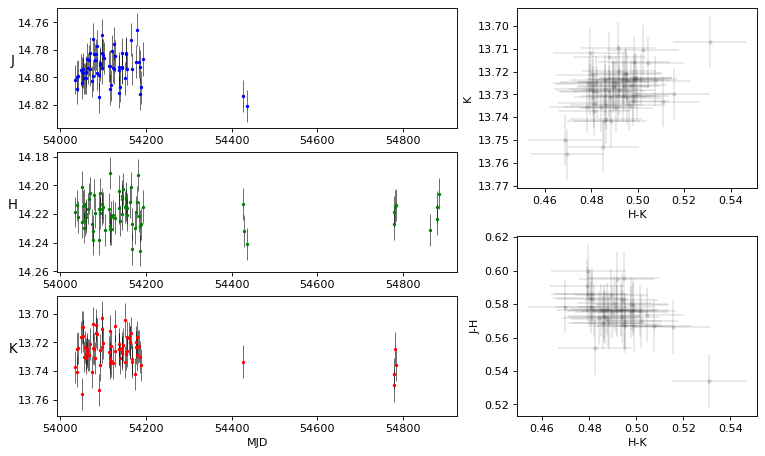

9 Robberto index #302 is 44199508513041.
 Match: 0.12 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.3, K=15.0
 Stetson variability index:  S=8.25
 


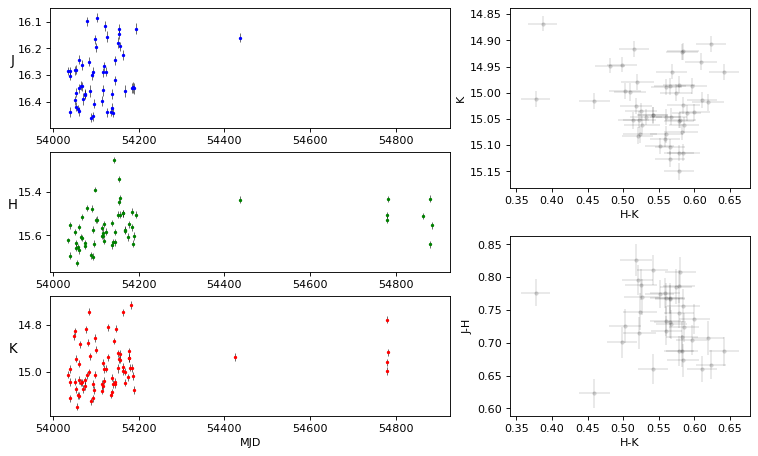

10 Robberto index #331 is 44199508516014.
 Match: 0.08 arcsec
 Published mags: F139M=13.7
 Measured mags:  J=13.4, K=12.2
 Stetson variability index:  S=8.45
 


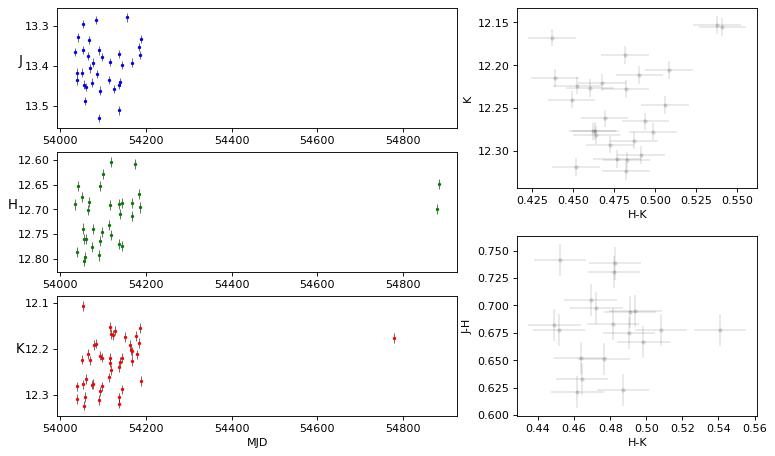

11 Robberto index #332 is 44199508512751.
 Match: 0.12 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.5, K=14.4
 Stetson variability index:  S=1.07
 


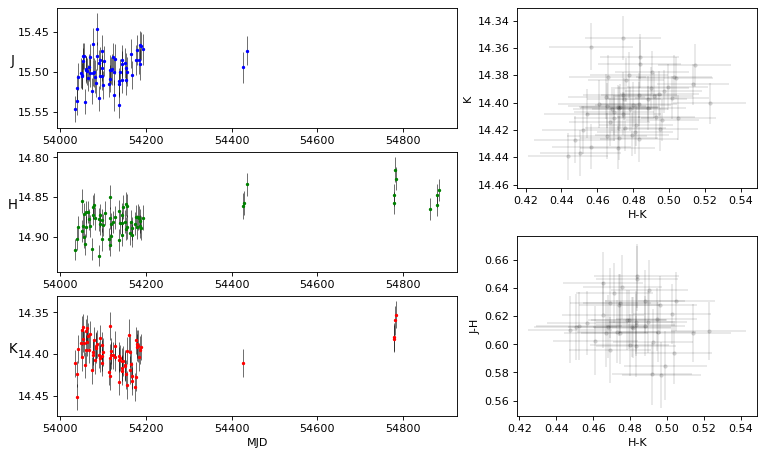

12 Robberto index #335 is 44199508512729.
 Match: 0.05 arcsec
 Published mags: F139M=17.1
 Measured mags:  J=17.0, K=16.0
 Stetson variability index:  S=-0.03
 


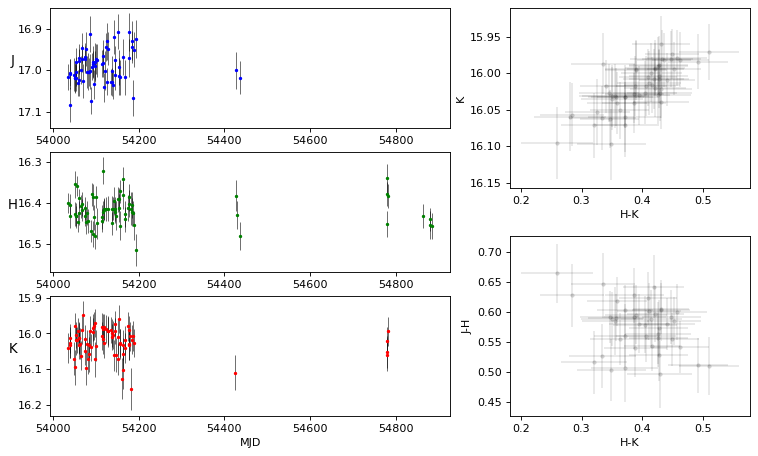

13 Robberto index #359 is 44199508469644.
 Match: 0.06 arcsec
 Published mags: F139M=14.0
 Measured mags:  J=13.9, K=12.9
 Stetson variability index:  S=3.18
 


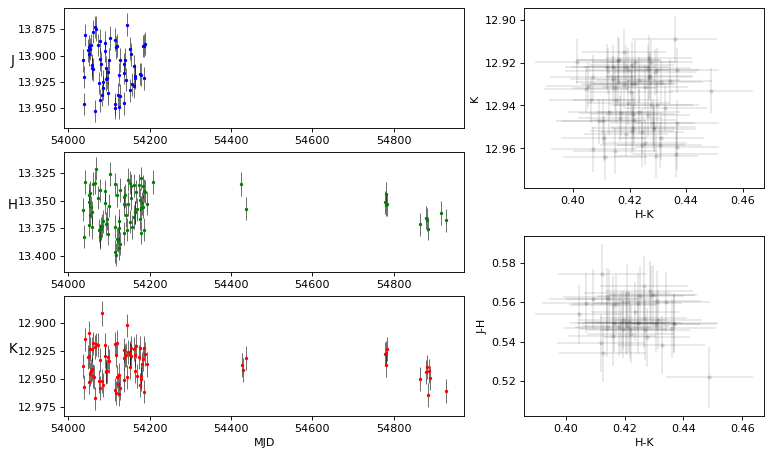

14 Robberto index #363 is 44199508512217.
 Match: 0.05 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.7, K=13.3
 Stetson variability index:  S=3.04
 


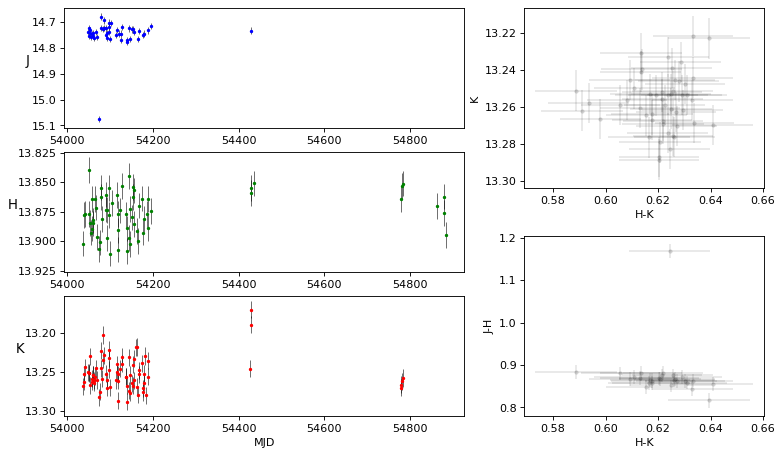

15 Robberto index #364 is 44199508469566.
 Match: 0.06 arcsec
 Published mags: F139M=15.0
 Measured mags:  J=14.9, K=13.9
 Stetson variability index:  S=0.55
 


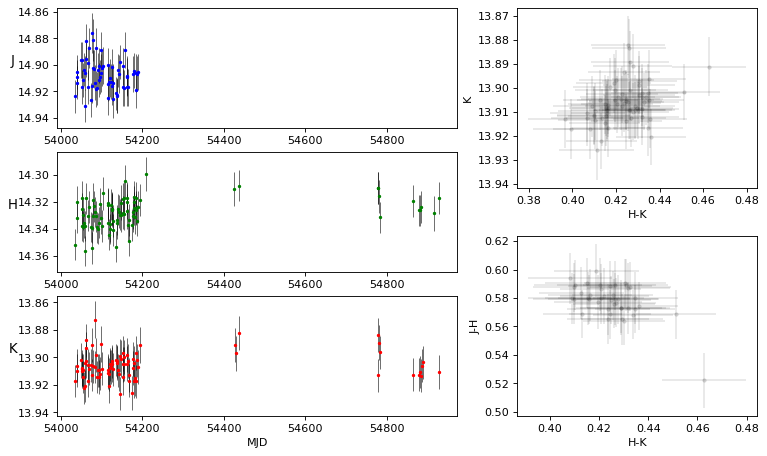

16 Robberto index #365 is 44199508469849.
 Match: 0.11 arcsec
 Published mags: F139M=15.5
 Measured mags:  J=15.5, K=14.5
 Stetson variability index:  S=0.60
 


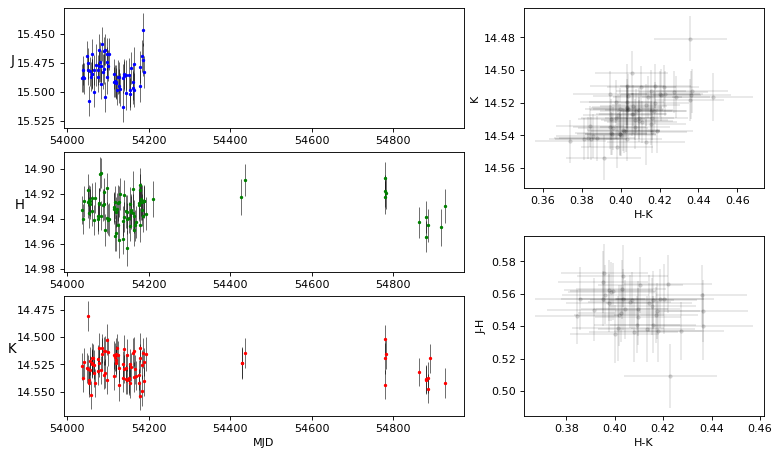

17 Robberto index #368 is 44199508470568.
 Match: 0.09 arcsec
 Published mags: F139M=15.8
 Measured mags:  J=15.7, K=14.5
 Stetson variability index:  S=4.54
 


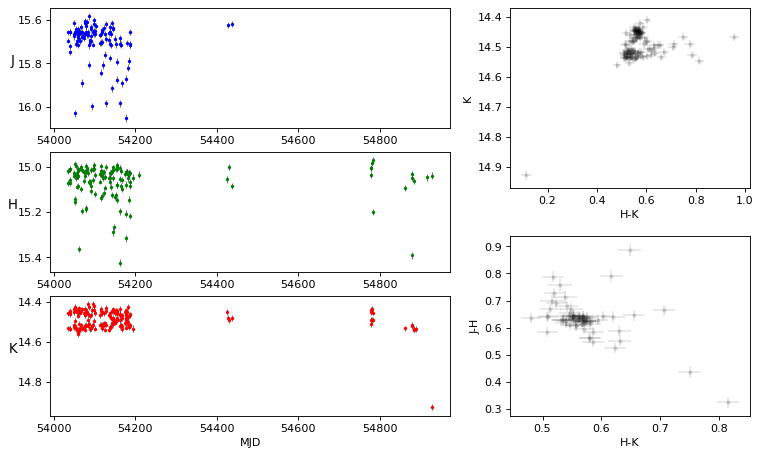

18 Robberto index #416 is 44199508512427.
 Match: 0.10 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=14.9, K=13.6
 Stetson variability index:  S=3.68
 


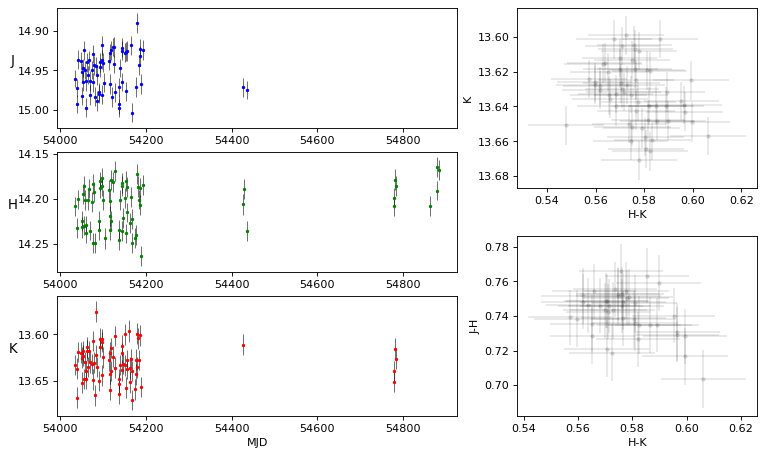

19 Robberto index #439 is 44199508511980.
 Match: 0.07 arcsec
 Published mags: F139M=14.2
 Measured mags:  J=14.2, K=13.1
 Stetson variability index:  S=0.67
 


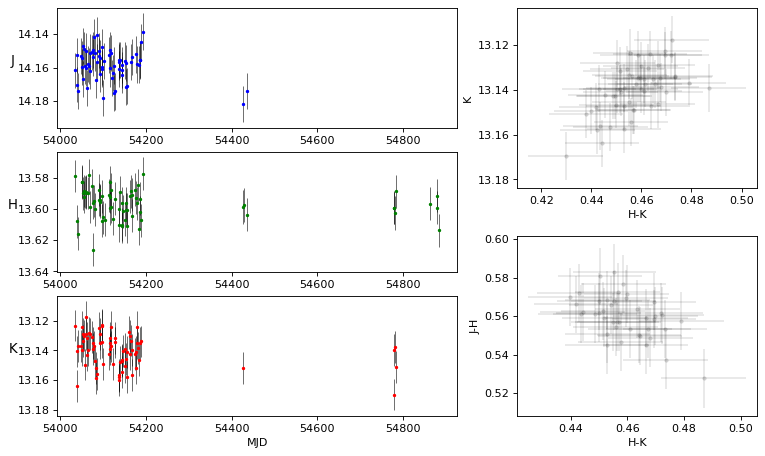

20 Robberto index #445 is 44199508469968.
 Match: 0.09 arcsec
 Published mags: F139M=17.8
 Measured mags:  J=17.7, K=16.3
 Stetson variability index:  S=-0.06
 


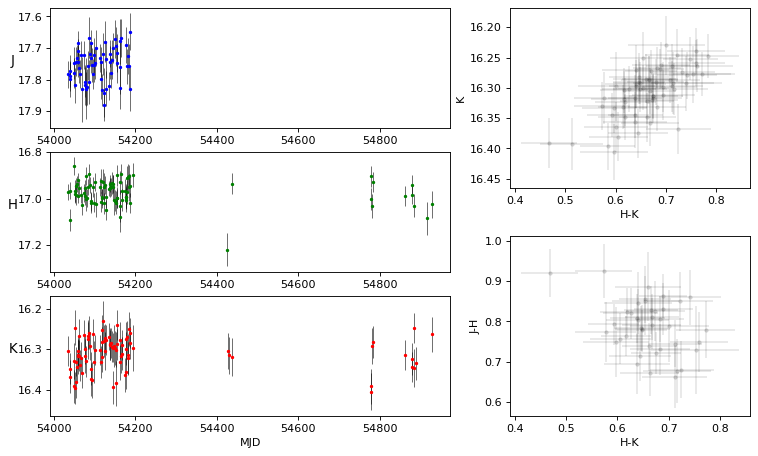

21 Robberto index #470 is 44199508515441.
 Match: 0.11 arcsec
 Published mags: F139M=15.0
 Measured mags:  J=15.2, K=13.7
 Stetson variability index:  S=7.56
 


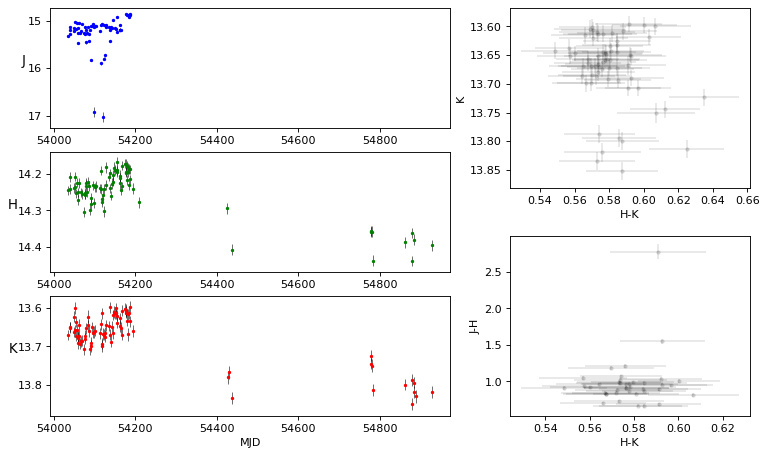

22 Robberto index #549 is 44199508469816.
 Match: 0.08 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=15.7
 Stetson variability index:  S=2.03
 


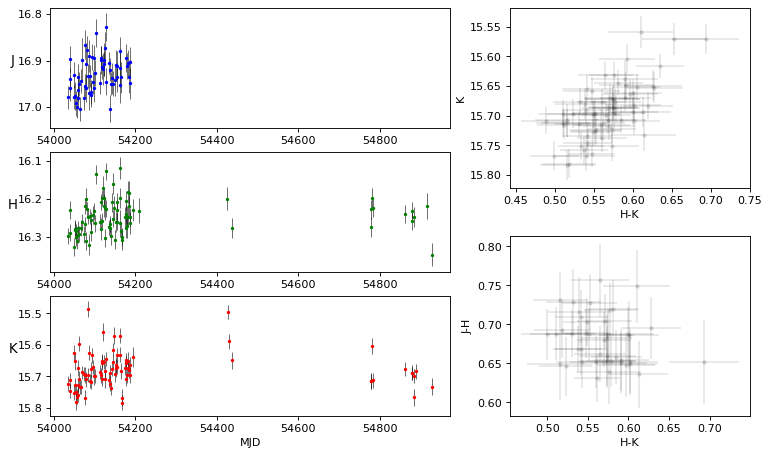

23 Robberto index #634 is 44199508470674.
 Match: 0.10 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=15.3, K=13.9
 Stetson variability index:  S=1.25
 


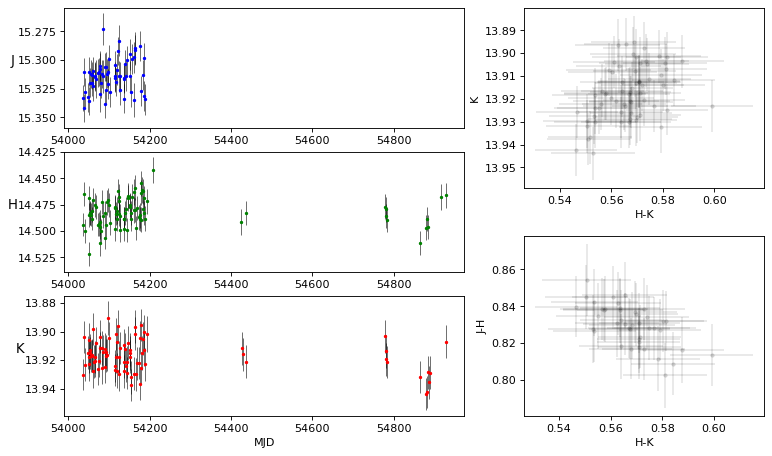

24 Robberto index #703 is 44199508515254.
 Match: 0.14 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.6, K=13.6
 Stetson variability index:  S=5.53
 


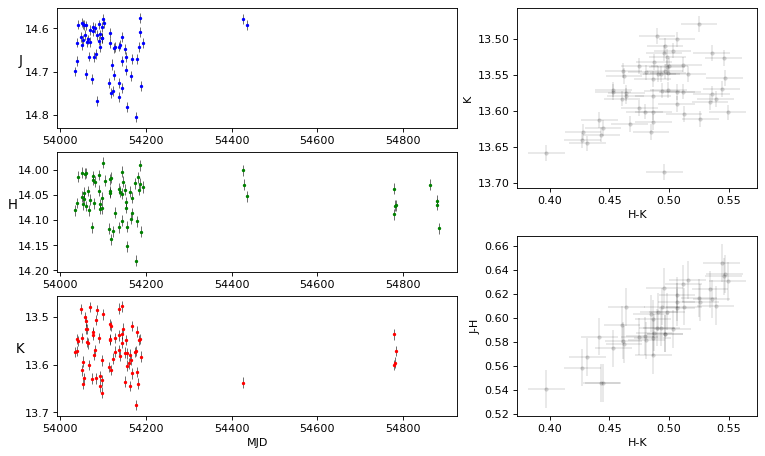

25 Robberto index #715 is 44199508514002.
 Match: 0.14 arcsec
 Published mags: F139M=14.5
 Measured mags:  J=14.4, K=13.4
 Stetson variability index:  S=2.29
 


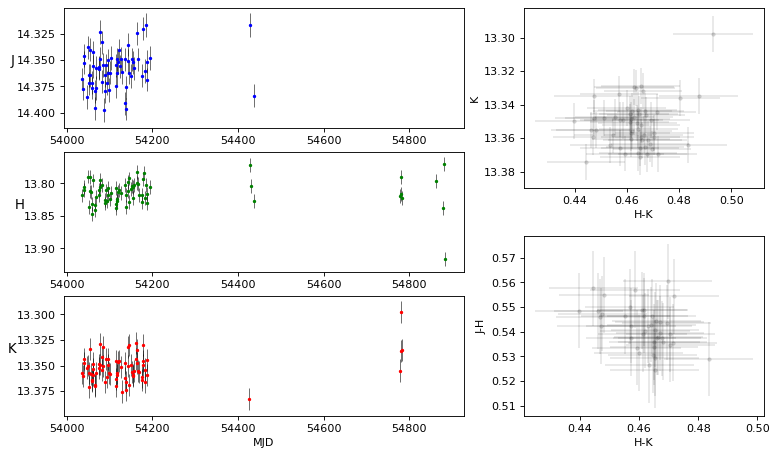

26 Robberto index #828 is 44199508512982.
 Match: 0.13 arcsec
 Published mags: F139M=14.1
 Measured mags:  J=14.0, K=13.0
 Stetson variability index:  S=2.23
 


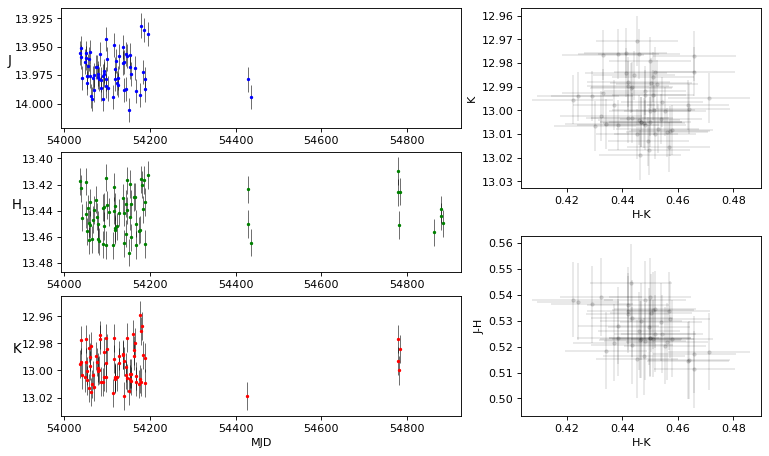

27 Robberto index #830 is 44199508512927.
 Match: 0.11 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.4, K=13.9
 Stetson variability index:  S=1.05
 


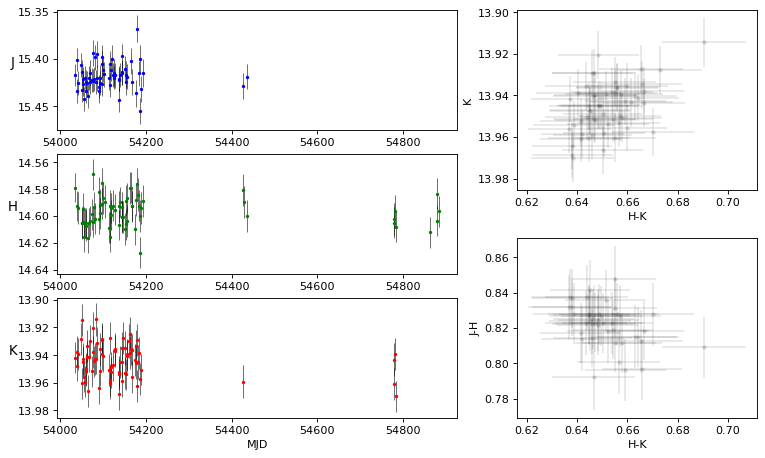

28 Robberto index #832 is 44199508512634.
 Match: 0.13 arcsec
 Published mags: F139M=16.1
 Measured mags:  J=15.9, K=14.8
 Stetson variability index:  S=2.19
 


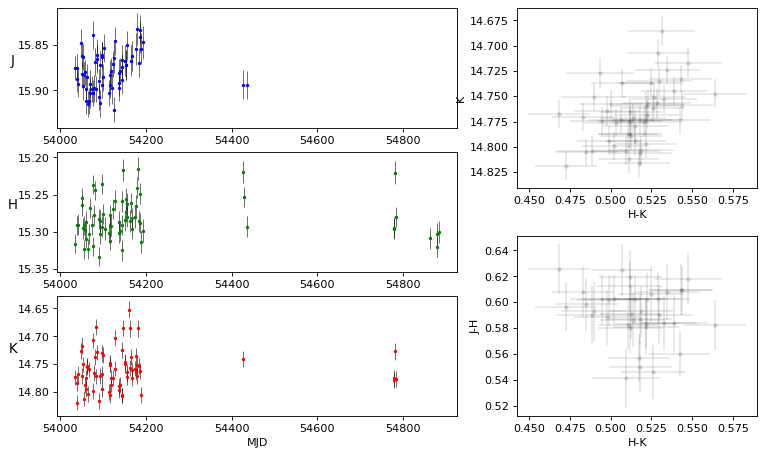

29 Robberto index #862 is 44199508512494.
 Match: 0.13 arcsec
 Published mags: F139M=13.2
 Measured mags:  J=13.2, K=11.7
 Stetson variability index:  S=34.33
 


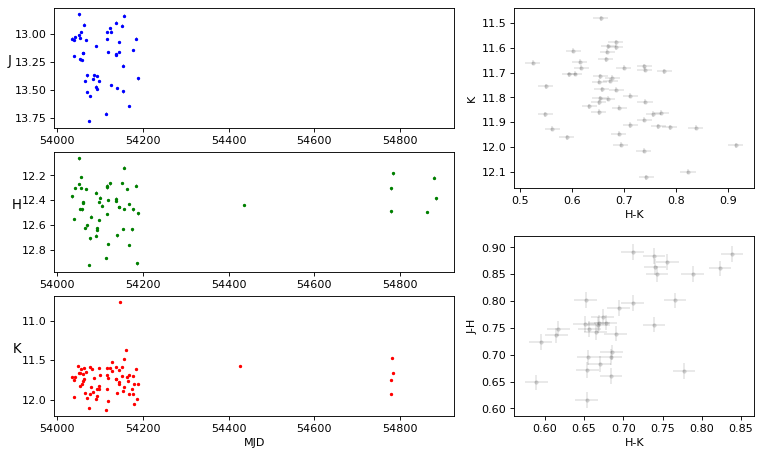

30 Robberto index #942 is 44199508511895.
 Match: 0.04 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.3, K=14.3
 Stetson variability index:  S=3.35
 


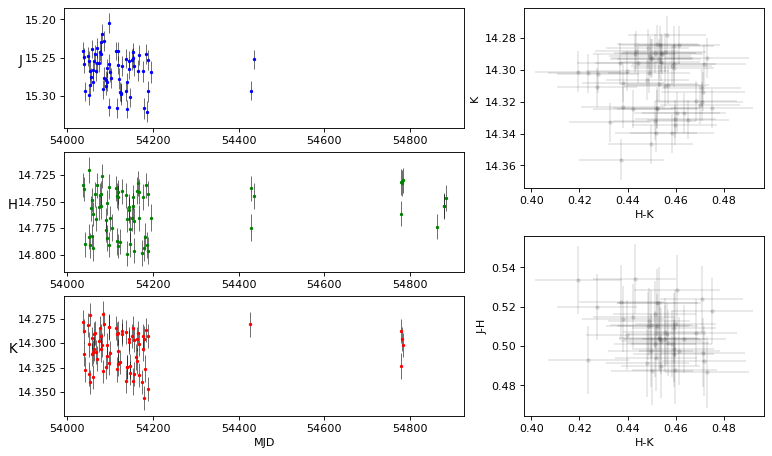

31 Robberto index #949 is 44199508511867.
 Match: 0.07 arcsec
 Published mags: F139M=13.3
 Measured mags:  J=13.2, K=12.1
 Stetson variability index:  S=1.71
 


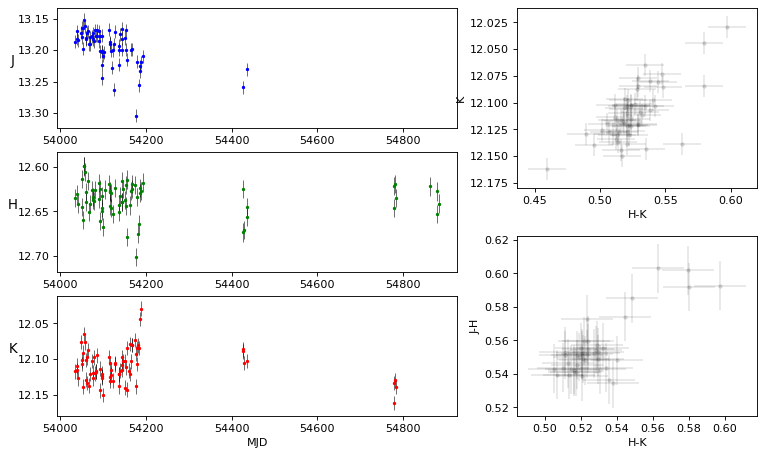

32 Robberto index #955 is 44199508511932.
 Match: 0.08 arcsec
 Published mags: F139M=16.7
 Measured mags:  J=16.5, K=15.4
 Stetson variability index:  S=0.23
 


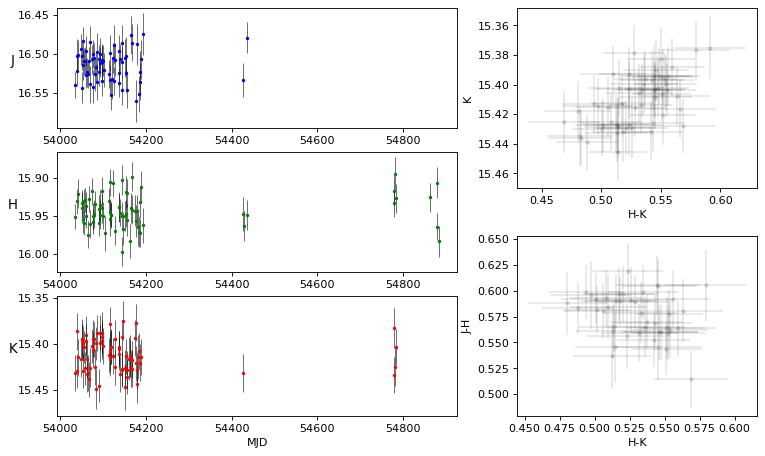

33 Robberto index #984 is 44199508470518.
 Match: 0.04 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.6, K=13.7
 Stetson variability index:  S=1.05
 


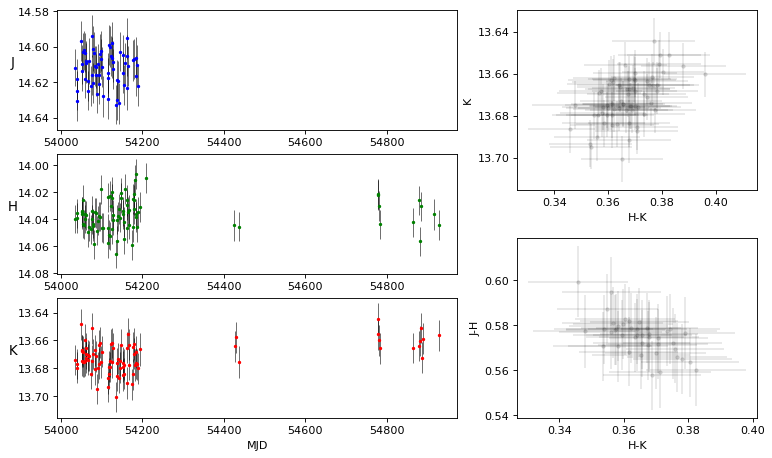

34 Robberto index #1021 is 44199508470345.
 Match: 0.08 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=14.6, K=13.5
 Stetson variability index:  S=29.11
 


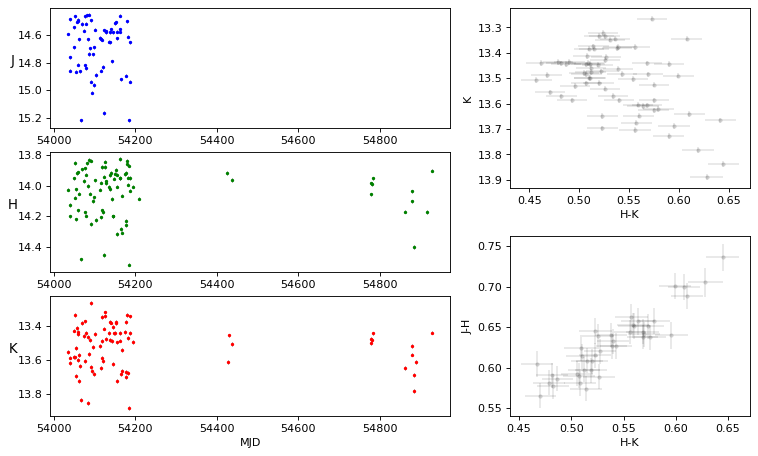

35 Robberto index #1022 is 44199508470714.
 Match: 0.05 arcsec
 Published mags: F139M=15.0
 Measured mags:  J=14.8, K=13.9
 Stetson variability index:  S=3.10
 


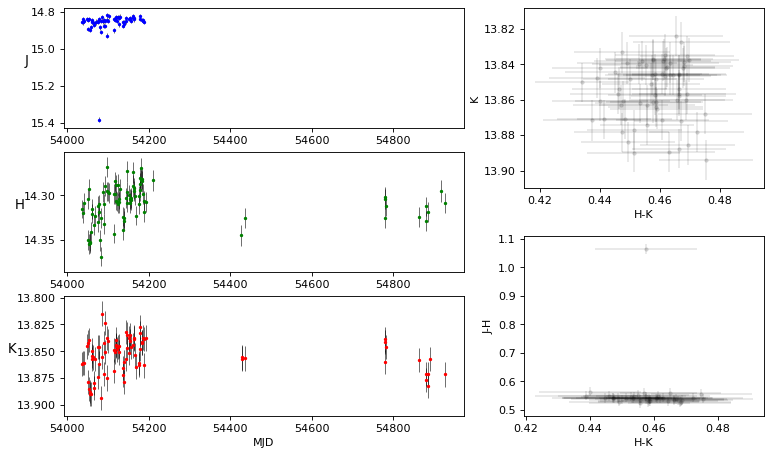

36 Robberto index #1023 is 44199508470557.
 Match: 0.08 arcsec
 Published mags: F139M=15.8
 Measured mags:  J=15.4, K=14.3
 Stetson variability index:  S=5.90
 


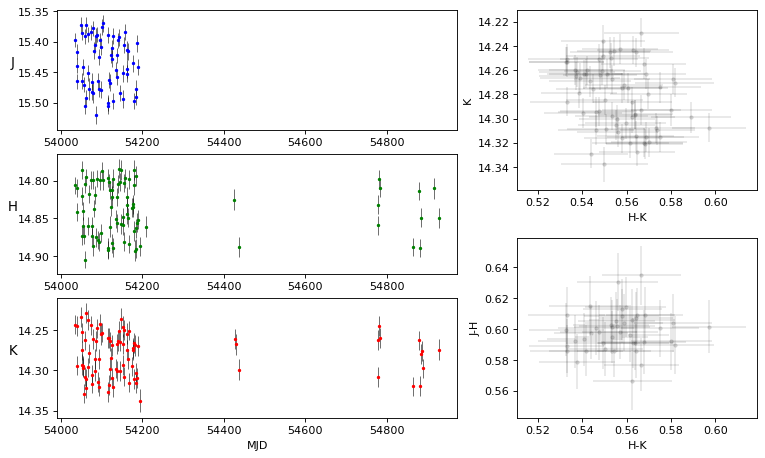

37 Robberto index #1043 is 44199508470532.
 Match: 0.04 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=15.1, K=14.1
 Stetson variability index:  S=4.49
 


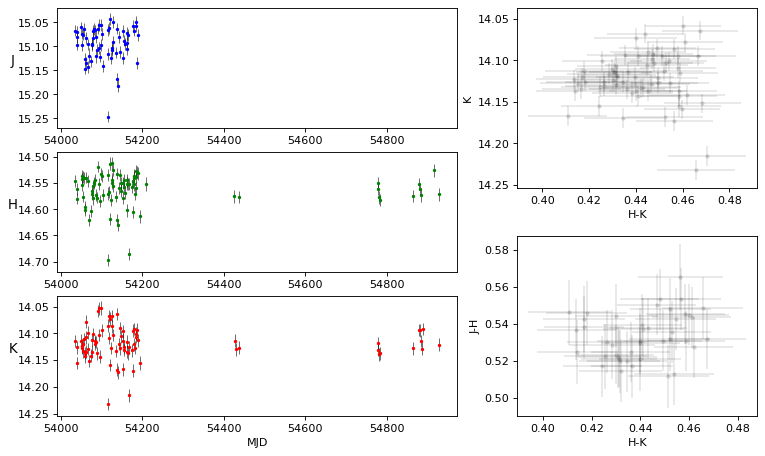

38 Robberto index #1085 is 44199508471016.
 Match: 0.20 arcsec
 Published mags: F139M=17.7
 Measured mags:  J=17.5, K=16.1
 Stetson variability index:  S=0.38
 


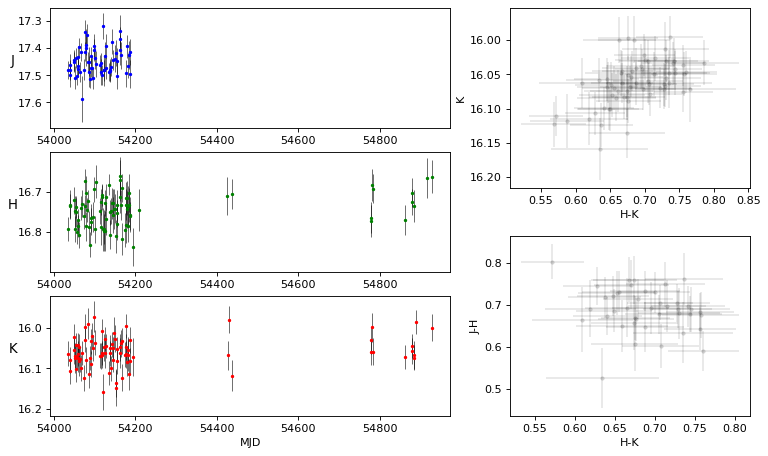

39 Robberto index #1162 is 44199508469255.
 Match: 0.20 arcsec
 Published mags: F139M=14.3
 Measured mags:  J=14.4, K=13.0
 Stetson variability index:  S=0.39
 


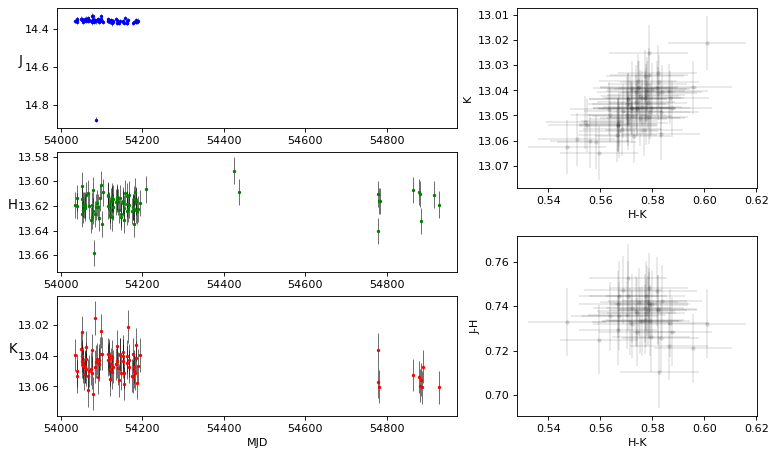

40 Robberto index #1194 is 44199508469185.
 Match: 0.18 arcsec
 Published mags: F139M=14.5
 Measured mags:  J=14.6, K=13.5
 Stetson variability index:  S=4.28
 


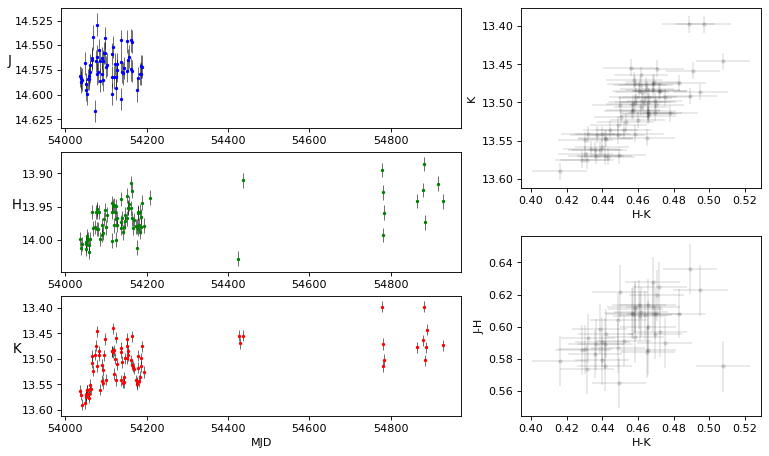

41 Robberto index #1231 is 44199508469125.
 Match: 0.21 arcsec
 Published mags: F139M=15.7
 Measured mags:  J=15.8, K=14.3
 Stetson variability index:  S=6.36
 


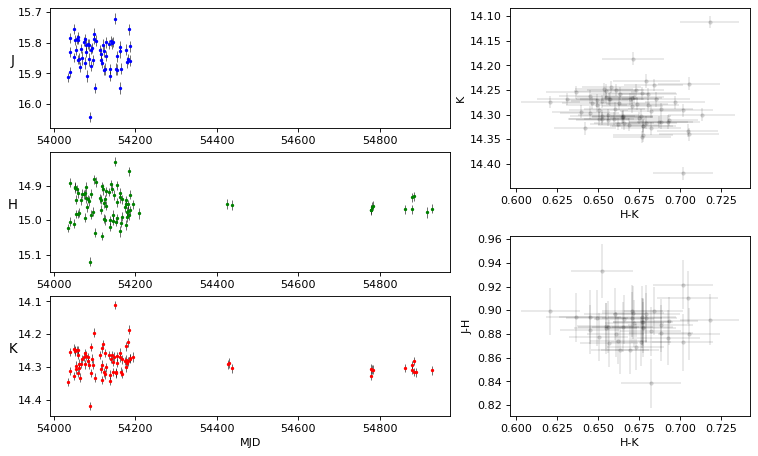

42 Robberto index #1233 is 44199508469025.
 Match: 0.11 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=16.0
 Stetson variability index:  S=0.28
 


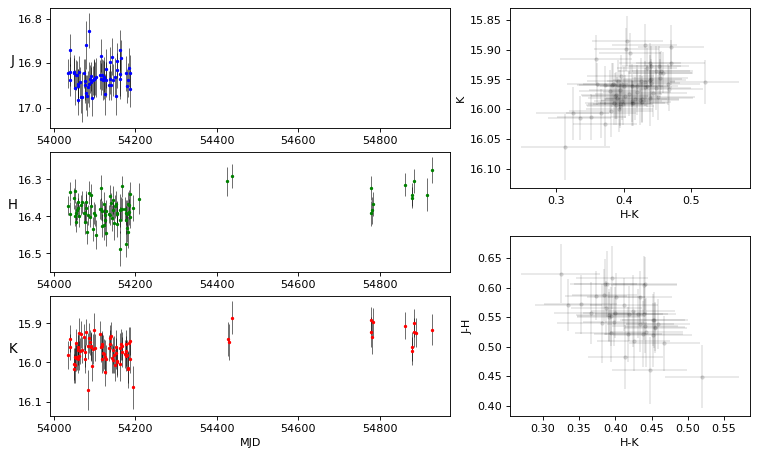

43 Robberto index #1272 is 44199508471912.
 Match: 0.17 arcsec
 Published mags: F139M=13.6
 Measured mags:  J=13.6, K=12.4
 Stetson variability index:  S=5.69
 


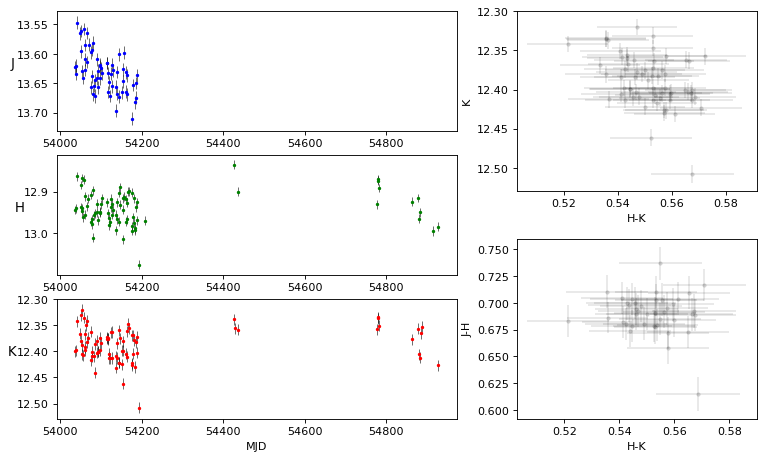

44 Robberto index #1274 is 44199508515473.
 Match: 0.13 arcsec
 Published mags: F139M=14.2
 Measured mags:  J=14.0, K=12.9
 Stetson variability index:  S=1.88
 


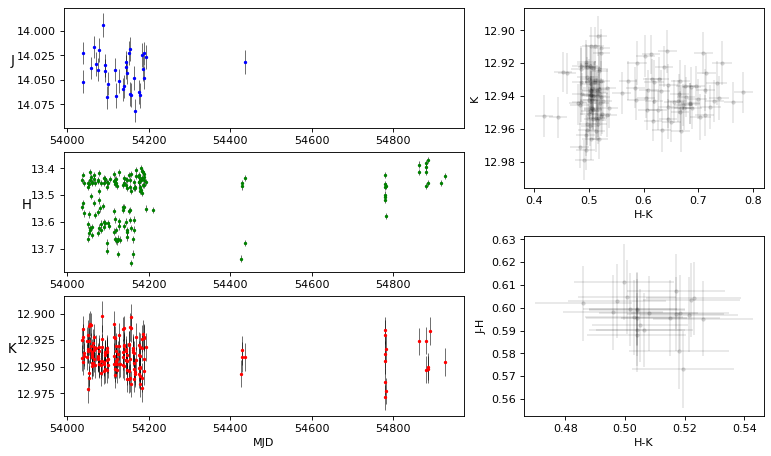

45 Robberto index #1275 is 44199508469098.
 Match: 0.12 arcsec
 Published mags: F139M=14.3
 Measured mags:  J=14.1, K=13.0
 Stetson variability index:  S=2.47
 


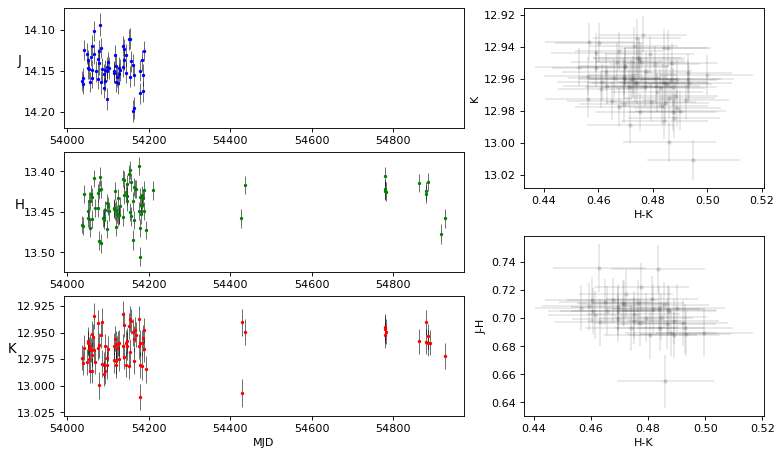

46 Robberto index #1277 is 44199508469091.
 Match: 0.10 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.4, K=13.2
 Stetson variability index:  S=2.65
 


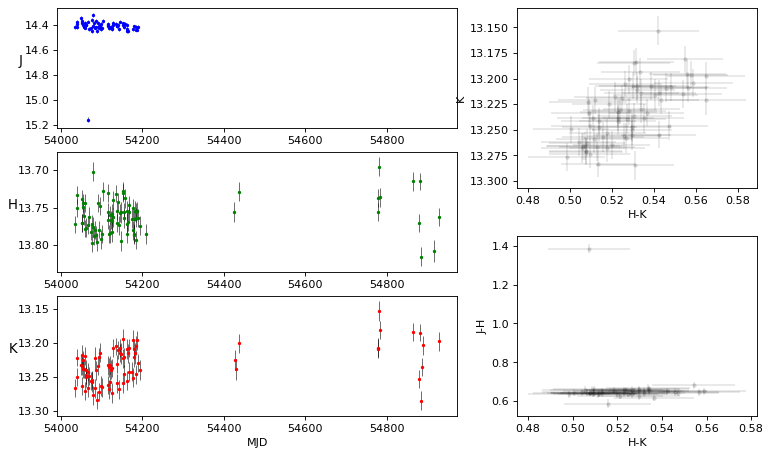

47 Robberto index #1280 is 44199508560853.
 Match: 0.19 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=16.2, K=15.0
 Stetson variability index:  S=2.96
 


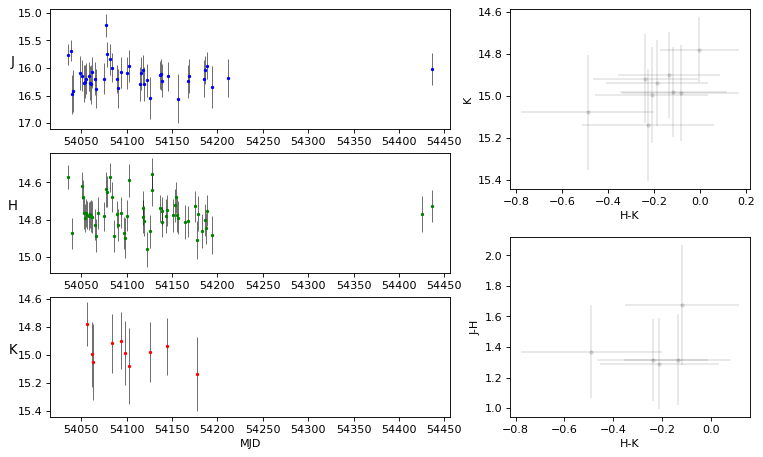

48 Robberto index #1286 is 44199508468993.
 Match: 0.10 arcsec
 Published mags: F139M=15.6
 Measured mags:  J=15.9, K=14.6
 Stetson variability index:  S=15.53
 


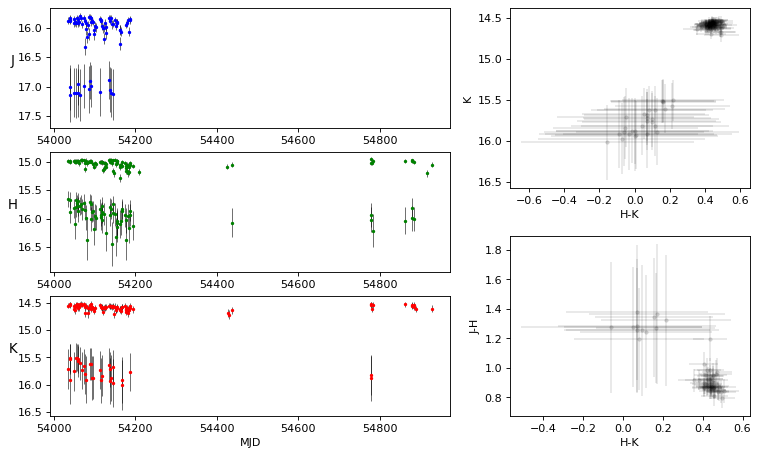

49 Robberto index #1289 is 44199508473503.
 Match: 0.14 arcsec
 Published mags: F139M=16.4
 Measured mags:  J=16.0, K=14.9
 Stetson variability index:  S=1.81
 


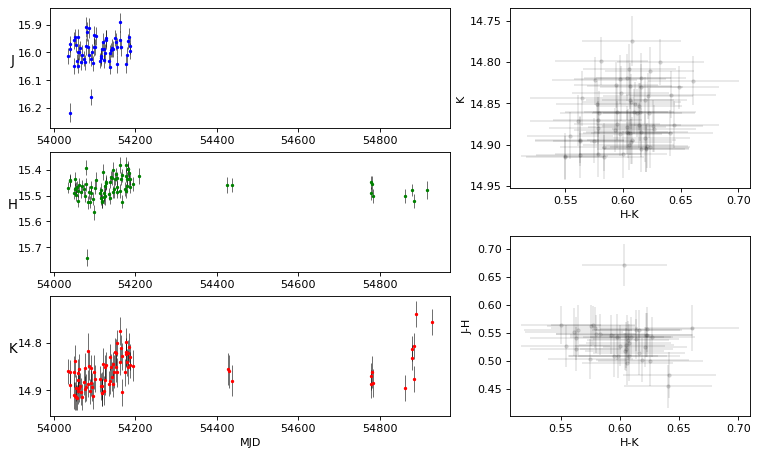

50 Robberto index #1296 is 44199508469038.
 Match: 0.13 arcsec
 Published mags: F139M=17.5
 Measured mags:  J=nan, K=16.9
 Stetson variability index:  S=nan
 


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


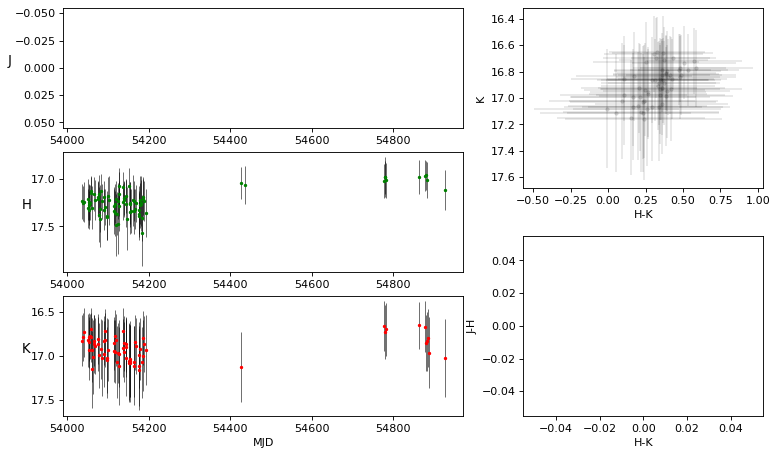

51 Robberto index #1335 is 44199508560882.
 Match: 0.13 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=16.0, K=14.6
 Stetson variability index:  S=2.32
 


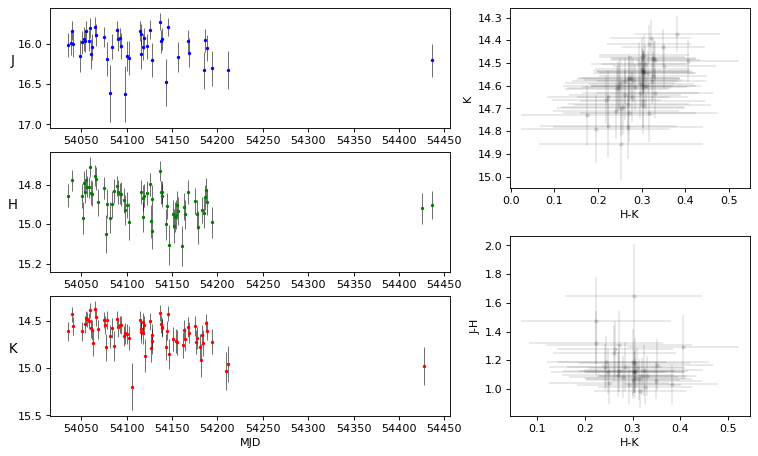

52 Robberto index #1336 is 44199508560972.
 Match: 0.17 arcsec
 Published mags: F139M=15.3
 Measured mags:  J=15.4, K=14.3
 Stetson variability index:  S=1.22
 


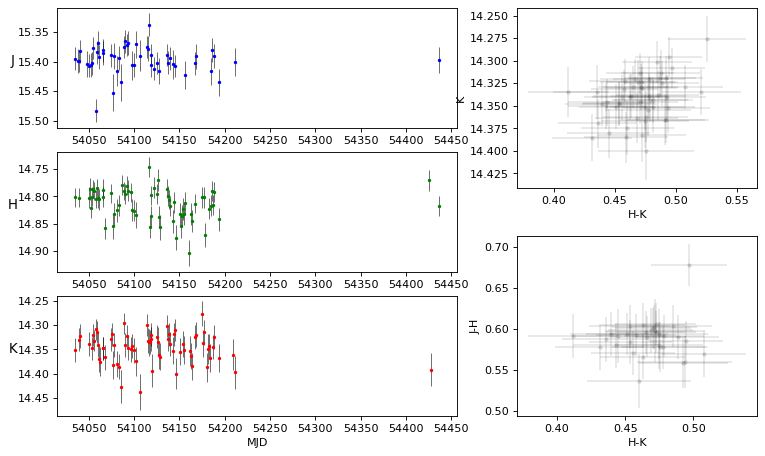

53 Robberto index #1379 is 44199508516239.
 Match: 0.19 arcsec
 Published mags: F139M=16.9
 Measured mags:  J=16.5, K=15.5
 Stetson variability index:  S=0.86
 


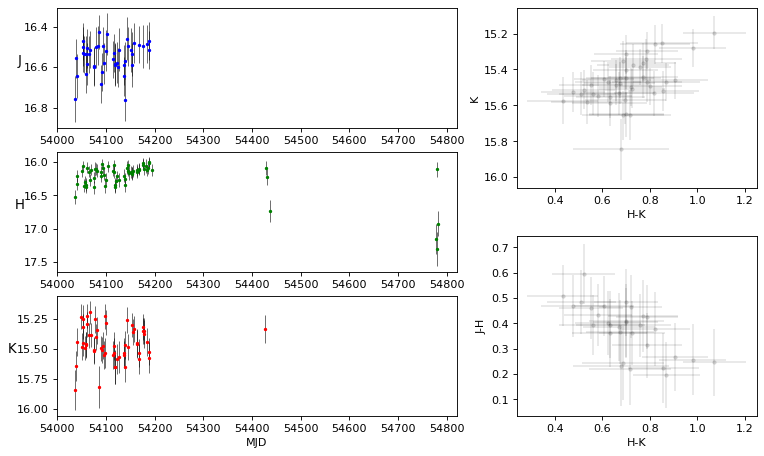

54 Robberto index #1381 is 44199508517393.
 Match: 0.18 arcsec
 Published mags: F139M=17.1
 Measured mags:  J=16.9, K=16.0
 Stetson variability index:  S=0.17
 


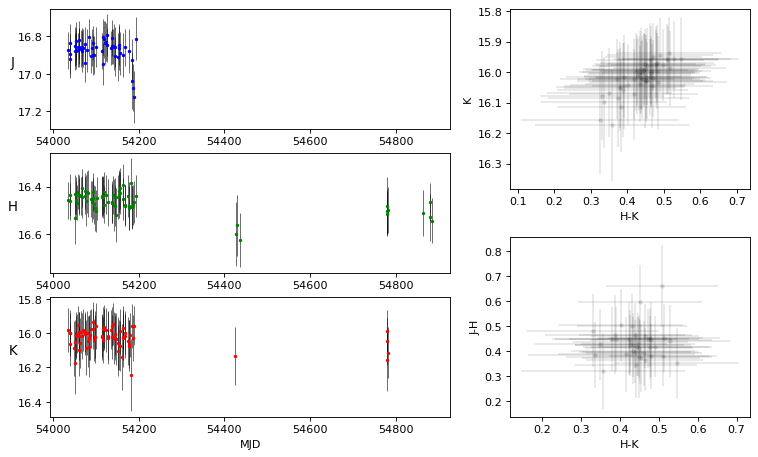

55 Robberto index #1385 is 44199508512915.
 Match: 0.18 arcsec
 Published mags: F139M=17.4
 Measured mags:  J=17.2, K=15.9
 Stetson variability index:  S=0.01
 


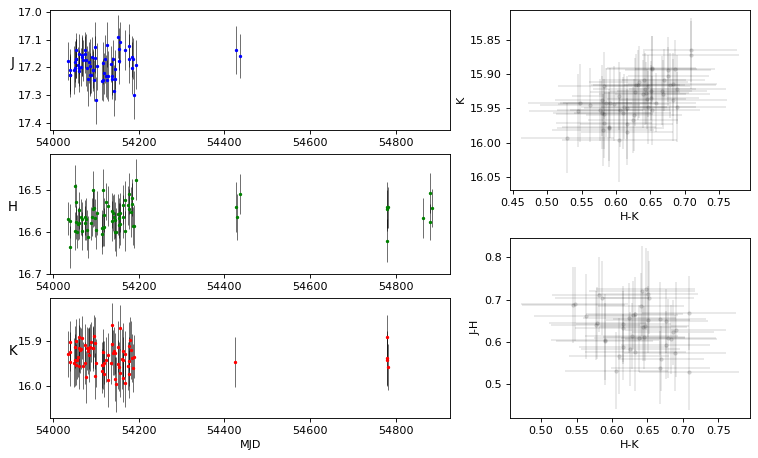

56 Robberto index #1431 is 44199508511967.
 Match: 0.18 arcsec
 Published mags: F139M=13.9
 Measured mags:  J=14.1, K=12.9
 Stetson variability index:  S=4.23
 


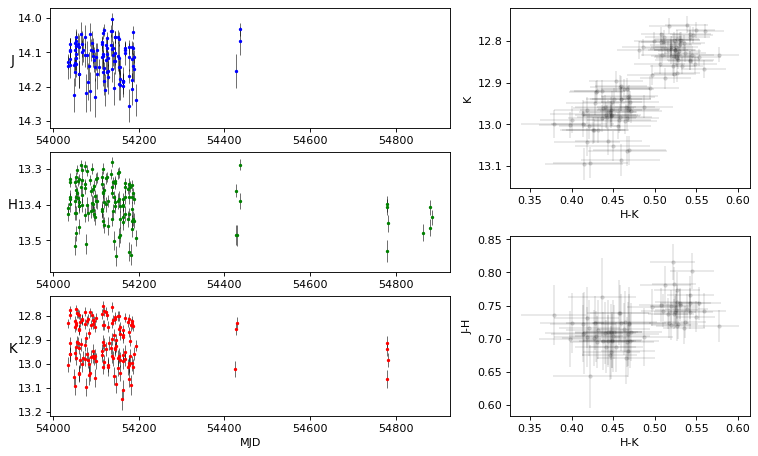

57 Robberto index #1433 is 44199508468992.
 Match: 0.10 arcsec
 Published mags: F139M=14.4
 Measured mags:  J=14.7, K=13.3
 Stetson variability index:  S=12.27
 


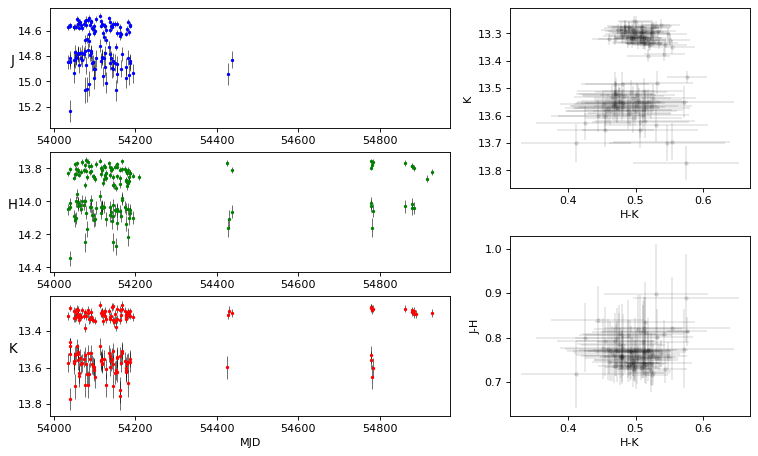

58 Robberto index #1499 is 44199508515816.
 Match: 0.21 arcsec
 Published mags: F139M=14.5
 Measured mags:  J=13.8, K=12.5
 Stetson variability index:  S=nan
 


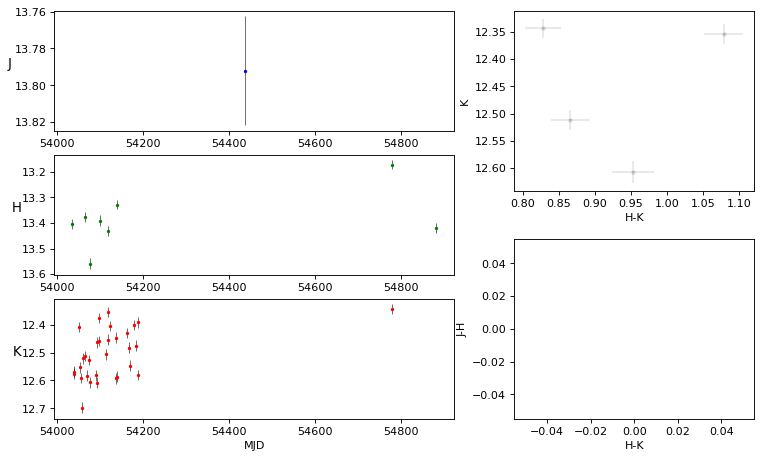

59 Robberto index #1545 is 44199508513584.
 Match: 0.15 arcsec
 Published mags: F139M=16.8
 Measured mags:  J=16.7, K=15.4
 Stetson variability index:  S=7.45
 


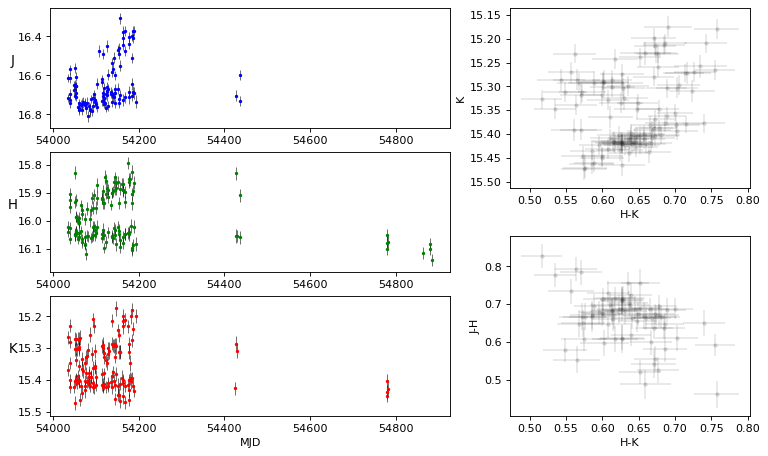

60 Robberto index #1548 is 44199508513658.
 Match: 0.18 arcsec
 Published mags: F139M=18.1
 Measured mags:  J=17.9, K=16.4
 Stetson variability index:  S=0.30
 


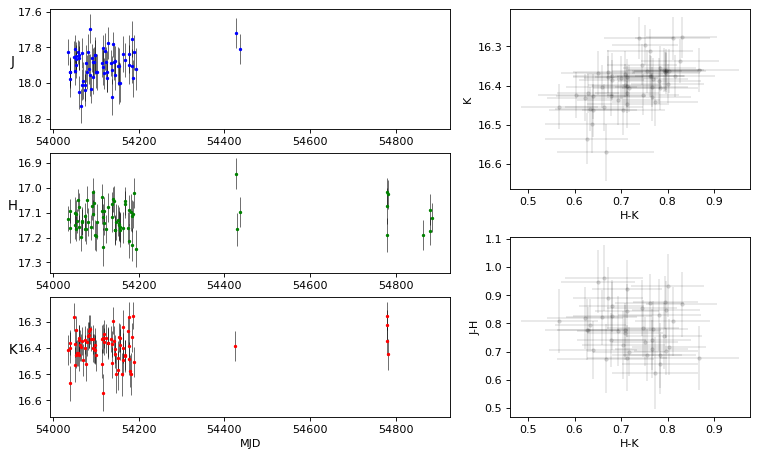

61 Robberto index #1571 is 44199508516255.
 Match: 0.18 arcsec
 Published mags: F139M=16.9
 Measured mags:  J=16.7, K=15.5
 Stetson variability index:  S=-0.02
 


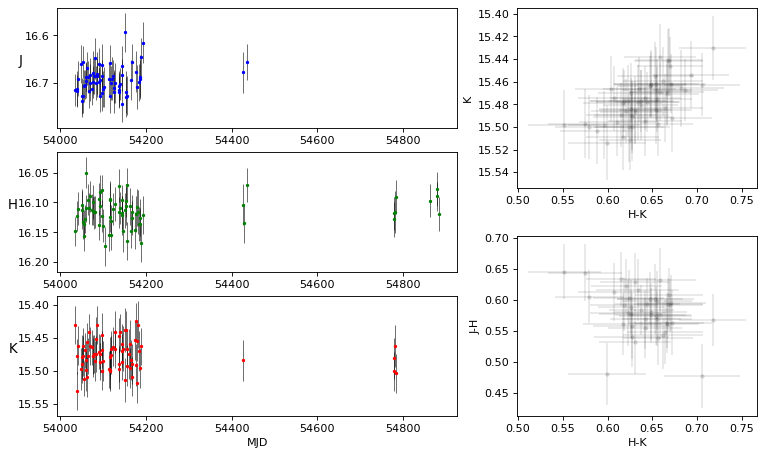

62 Robberto index #1592 is 44199508518735.
 Match: 0.09 arcsec
 Published mags: F139M=14.0
 Measured mags:  J=13.9, K=12.8
 Stetson variability index:  S=3.90
 


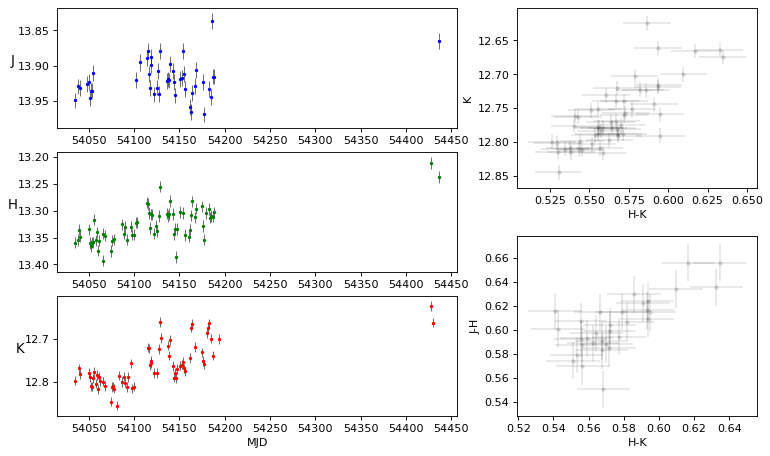

63 Robberto index #1598 is 44199508518579.
 Match: 0.22 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.4, K=13.9
 Stetson variability index:  S=4.51
 


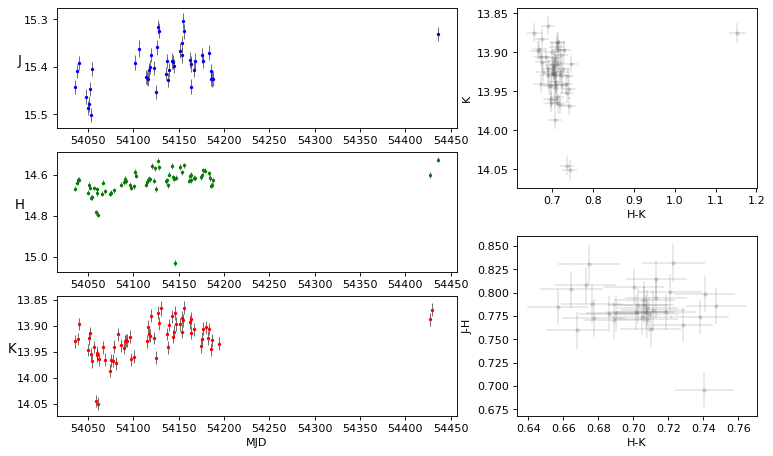

64 Robberto index #1625 is 44199508514001.
 Match: 0.17 arcsec
 Published mags: F139M=15.3
 Measured mags:  J=15.2, K=14.1
 Stetson variability index:  S=1.06
 


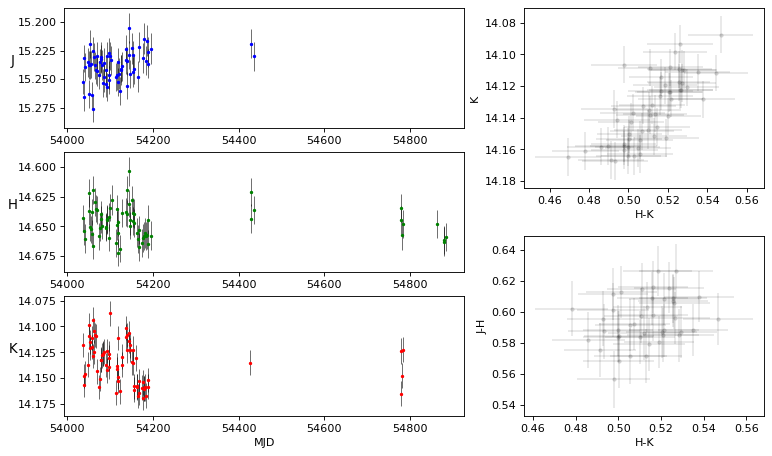

65 Robberto index #1687 is 44199508518585.
 Match: 0.09 arcsec
 Published mags: F139M=15.1
 Measured mags:  J=14.8, K=13.7
 Stetson variability index:  S=3.19
 


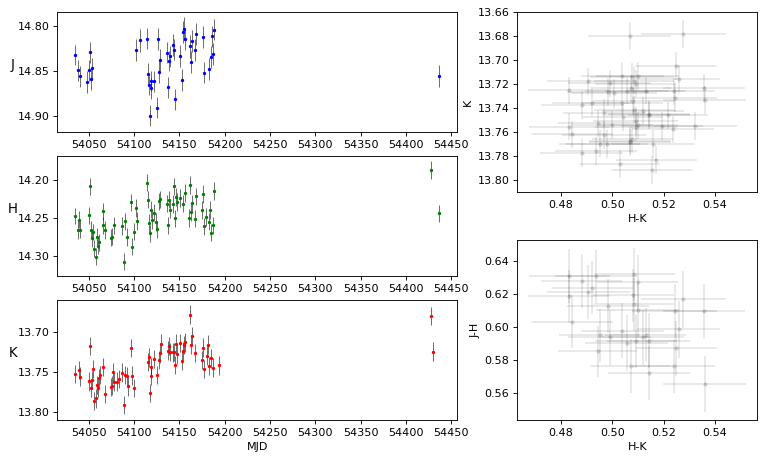

66 Robberto index #1901 is 44199508553850.
 Match: 0.03 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.6, K=13.7
 Stetson variability index:  S=1.53
 


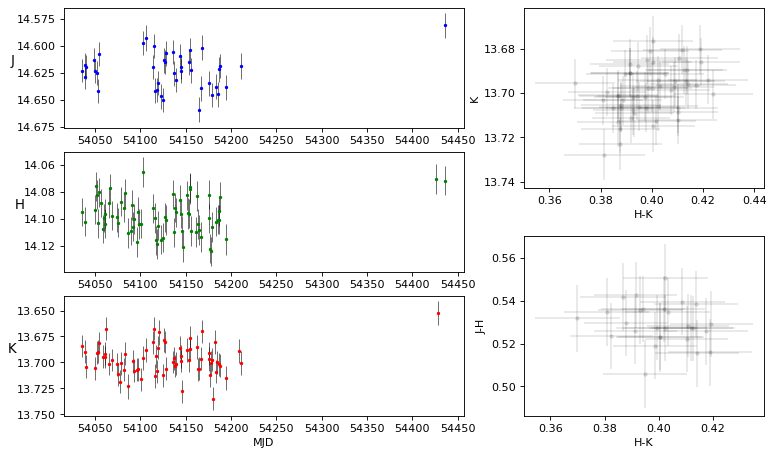

67 Robberto index #1931 is 44199508519131.
 Match: 0.03 arcsec
 Published mags: F139M=14.2
 Measured mags:  J=14.0, K=13.0
 Stetson variability index:  S=1.26
 


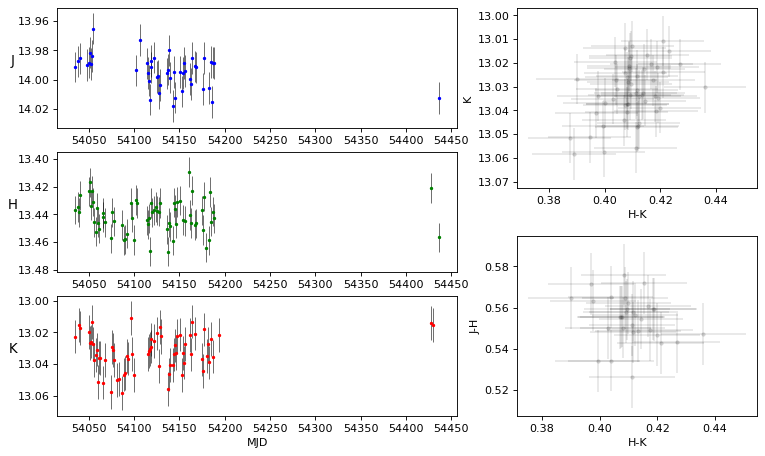

68 Robberto index #1933 is 44199508518970.
 Match: 0.04 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.4, K=14.4
 Stetson variability index:  S=0.24
 


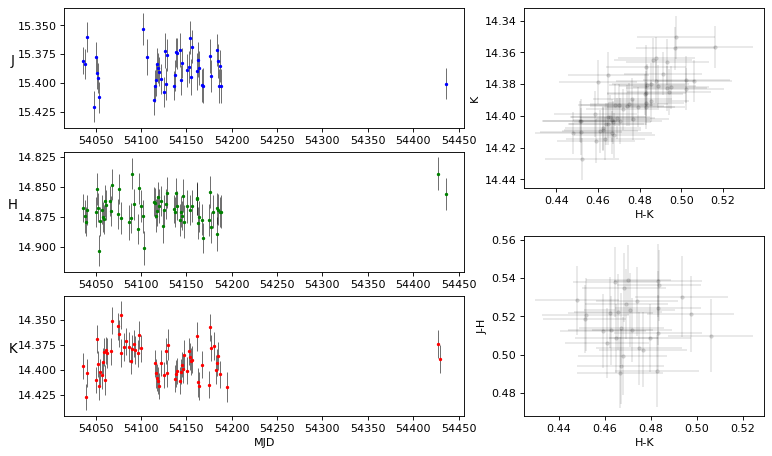

69 Robberto index #1988 is 44199508519430.
 Match: 0.02 arcsec
 Published mags: F139M=15.0
 Measured mags:  J=15.0, K=13.9
 Stetson variability index:  S=1.48
 


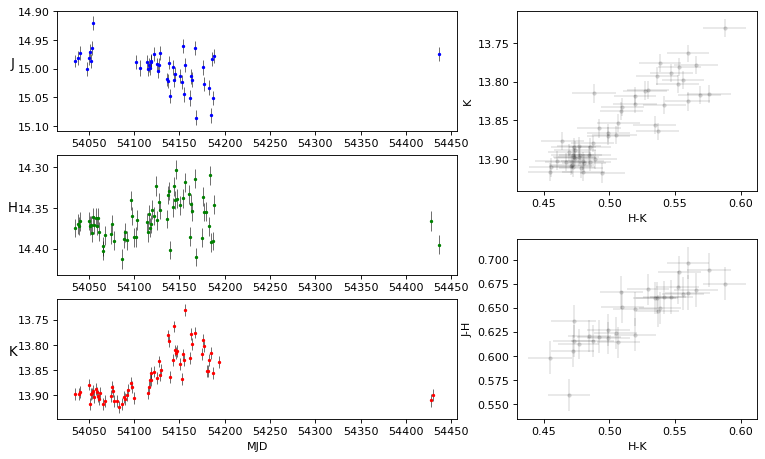

70 Robberto index #2018 is 44199508519002.
 Match: 0.05 arcsec
 Published mags: F139M=14.1
 Measured mags:  J=14.0, K=12.6
 Stetson variability index:  S=21.98
 


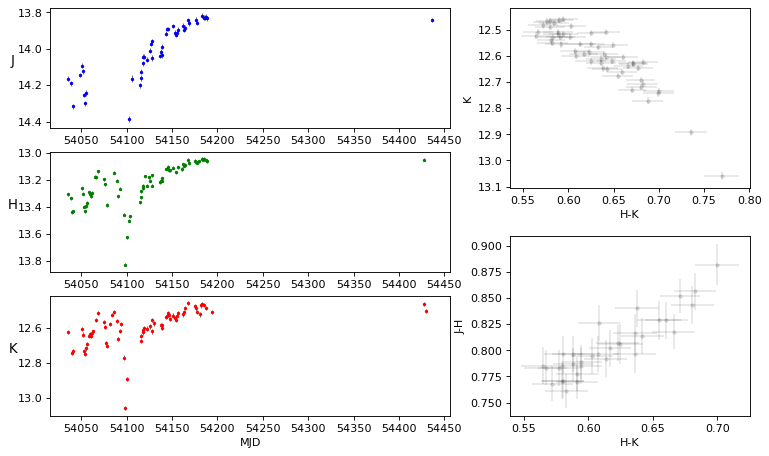

71 Robberto index #2045 is 44199508518967.
 Match: 0.03 arcsec
 Published mags: F139M=16.2
 Measured mags:  J=15.9, K=14.6
 Stetson variability index:  S=2.84
 


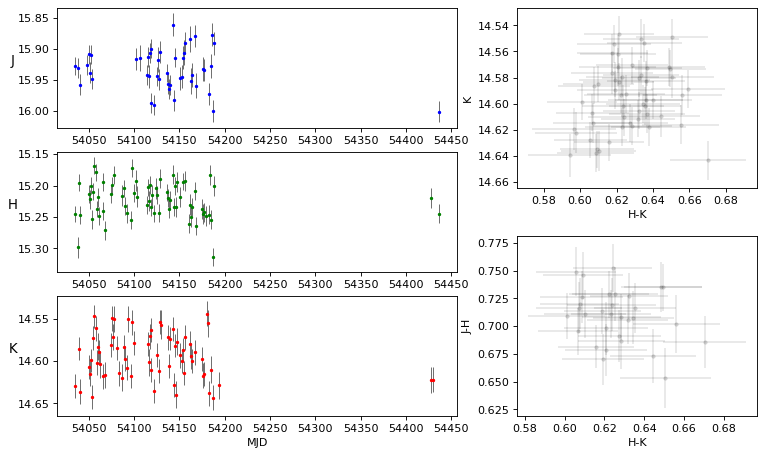

72 Robberto index #2072 is 44199508519205.
 Match: 0.08 arcsec
 Published mags: F139M=14.8
 Measured mags:  J=14.7, K=13.5
 Stetson variability index:  S=1.16
 


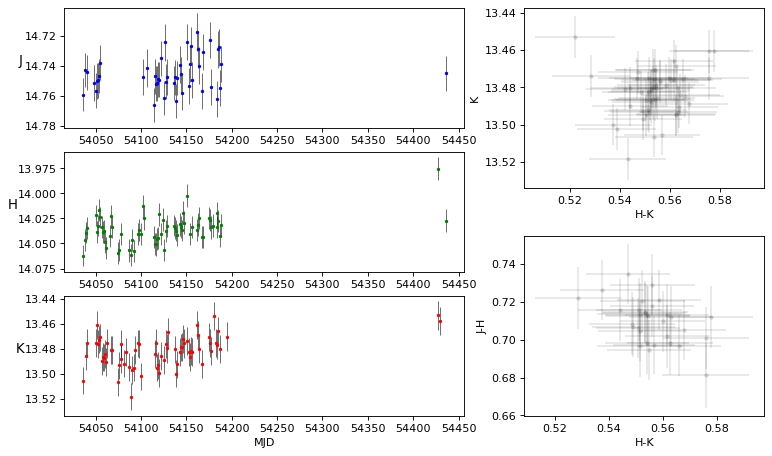

73 Robberto index #2181 is 44199508518851.
 Match: 0.05 arcsec
 Published mags: F139M=14.0
 Measured mags:  J=14.2, K=nan
 Stetson variability index:  S=nan
 


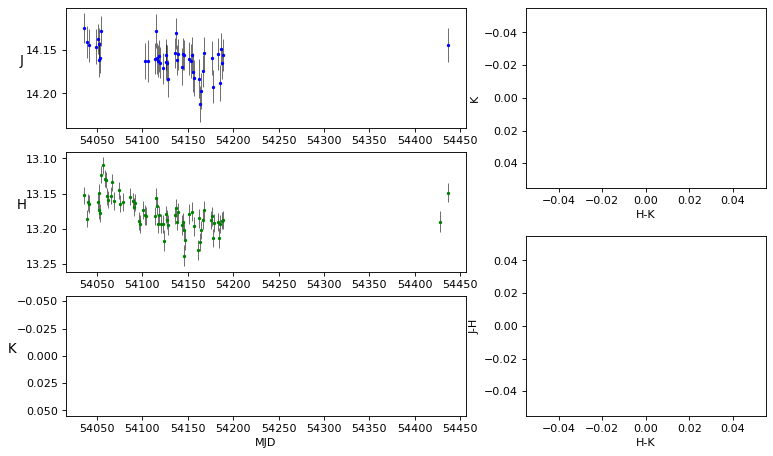

74 Robberto index #2286 is 44199508518819.
 Match: 0.08 arcsec
 Published mags: F139M=13.5
 Measured mags:  J=13.3, K=12.1
 Stetson variability index:  S=1.48
 


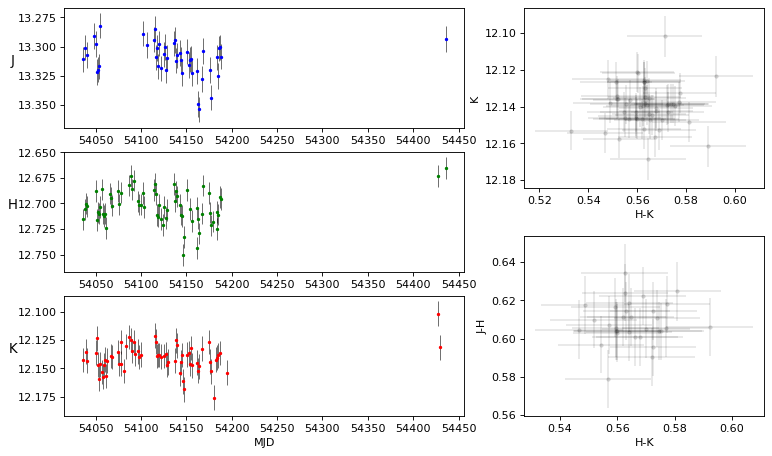

75 Robberto index #2292 is 44199508519102.
 Match: 0.07 arcsec
 Published mags: F139M=14.1
 Measured mags:  J=14.0, K=13.1
 Stetson variability index:  S=1.38
 


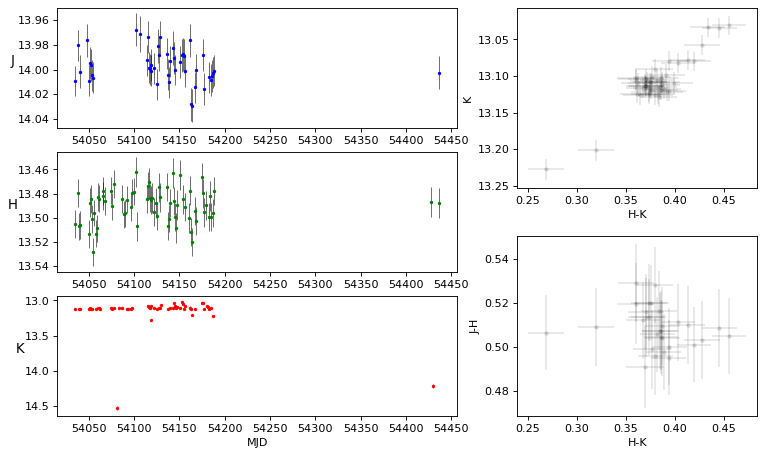

76 Robberto index #2316 is 44199508521120.
 Match: 0.13 arcsec
 Published mags: F139M=17.3
 Measured mags:  J=nan, K=16.4
 Stetson variability index:  S=nan
 


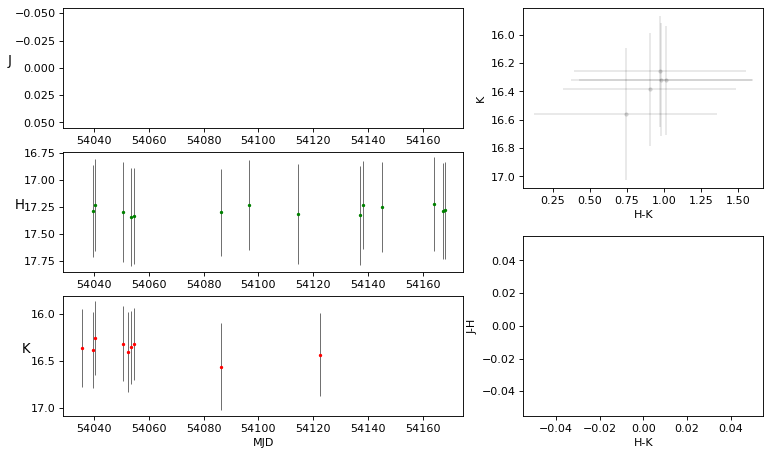

77 Robberto index #2334 is 44199508519506.
 Match: 0.11 arcsec
 Published mags: F139M=14.3
 Measured mags:  J=14.3, K=13.3
 Stetson variability index:  S=0.86
 


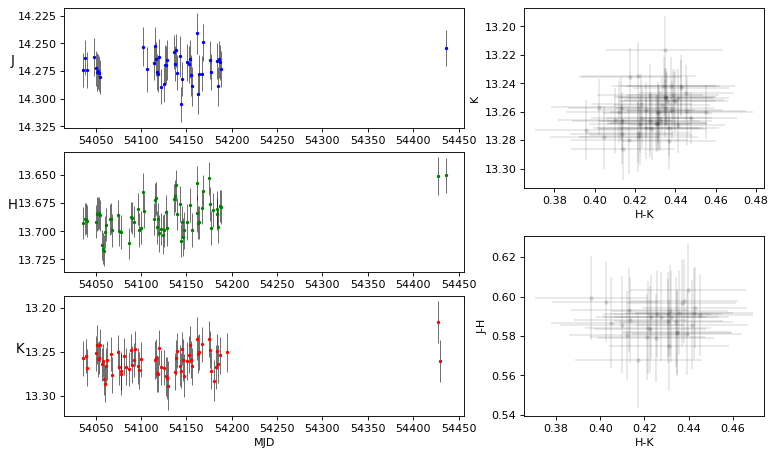

78 Robberto index #2337 is 44199508519493.
 Match: 0.11 arcsec
 Published mags: F139M=15.1
 Measured mags:  J=14.9, K=13.6
 Stetson variability index:  S=3.99
 


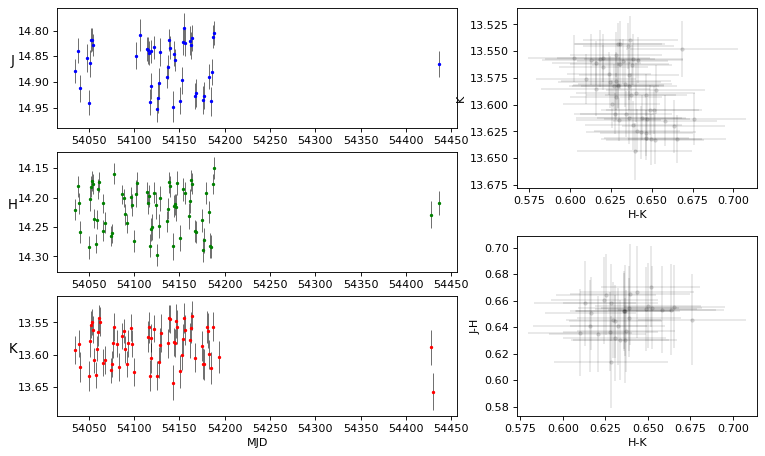

79 Robberto index #2412 is 44199508518765.
 Match: 0.21 arcsec
 Published mags: F139M=14.0
 Measured mags:  J=13.9, K=12.6
 Stetson variability index:  S=3.16
 


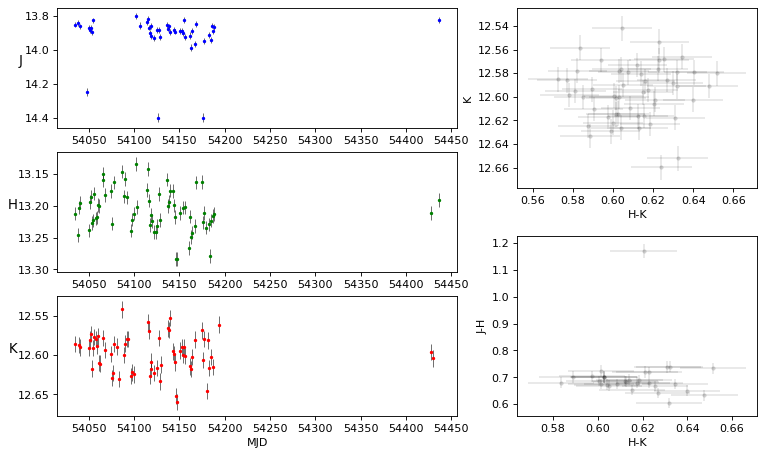

80 Robberto index #2527 is 44199508521269.
 Match: 0.11 arcsec
 Published mags: F139M=17.1
 Measured mags:  J=nan, K=17.2
 Stetson variability index:  S=nan
 


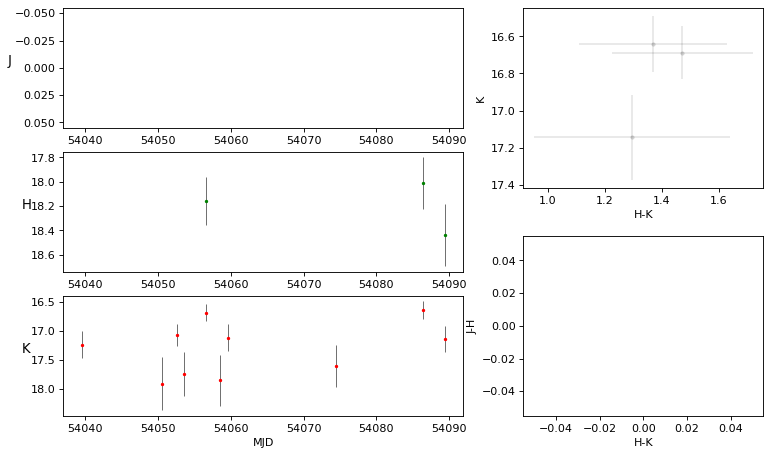

81 Robberto index #2556 is 44199508518618.
 Match: 0.11 arcsec
 Published mags: F139M=16.3
 Measured mags:  J=16.4, K=15.7
 Stetson variability index:  S=0.78
 


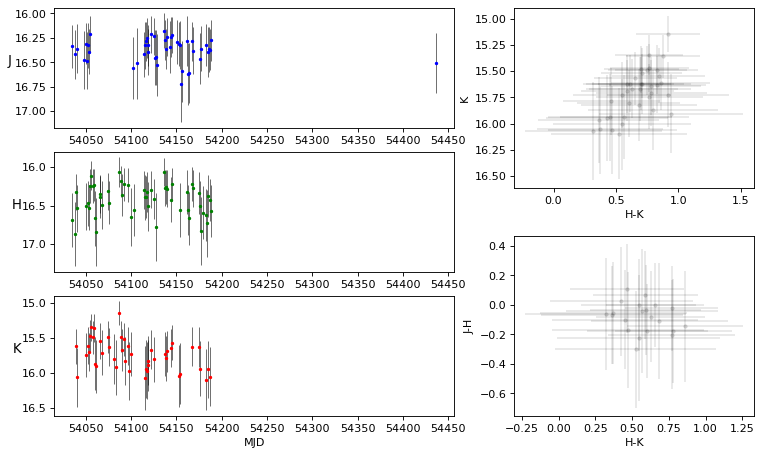

82 Robberto index #2811 is 44199508519464.
 Match: 0.09 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.6, K=13.3
 Stetson variability index:  S=2.03
 


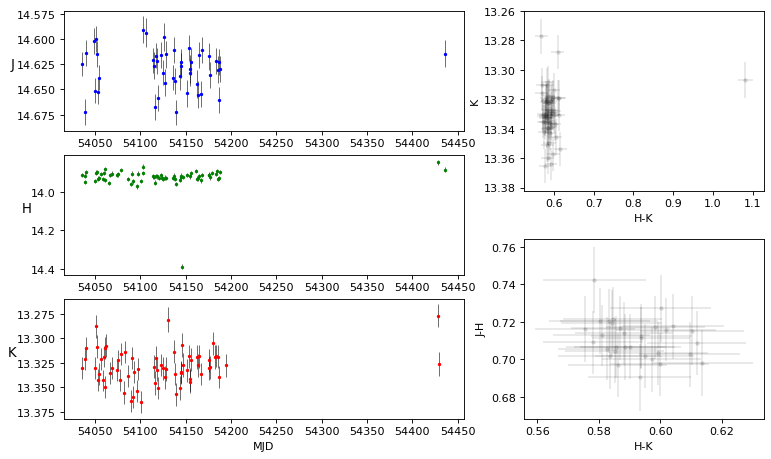

83 Robberto index #2864 is 44199508522869.
 Match: 0.16 arcsec
 Published mags: F139M=14.4
 Measured mags:  J=14.4, K=13.3
 Stetson variability index:  S=1.51
 


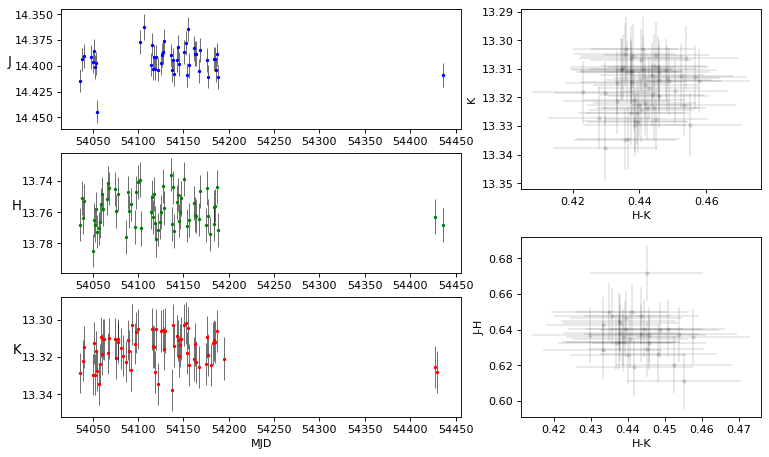

84 Robberto index #2930 is 44199508519549.
 Match: 0.15 arcsec
 Published mags: F139M=14.4
 Measured mags:  J=14.6, K=12.8
 Stetson variability index:  S=nan
 


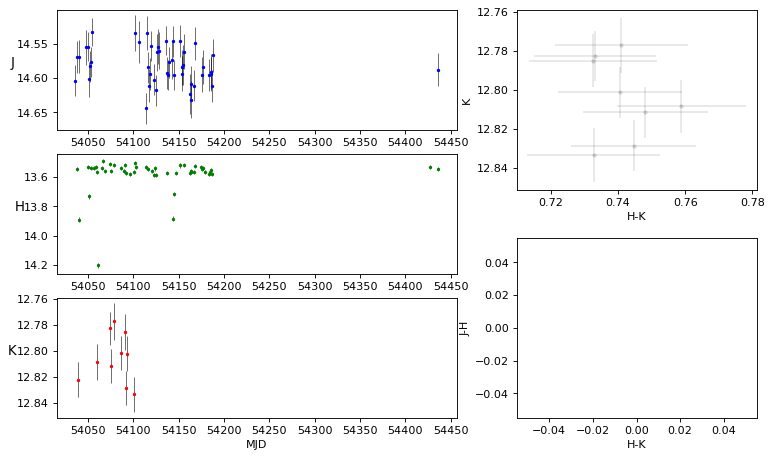

85 Robberto index #2934 is 44199508522616.
 Match: 0.16 arcsec
 Published mags: F139M=14.8
 Measured mags:  J=14.6, K=13.4
 Stetson variability index:  S=2.44
 


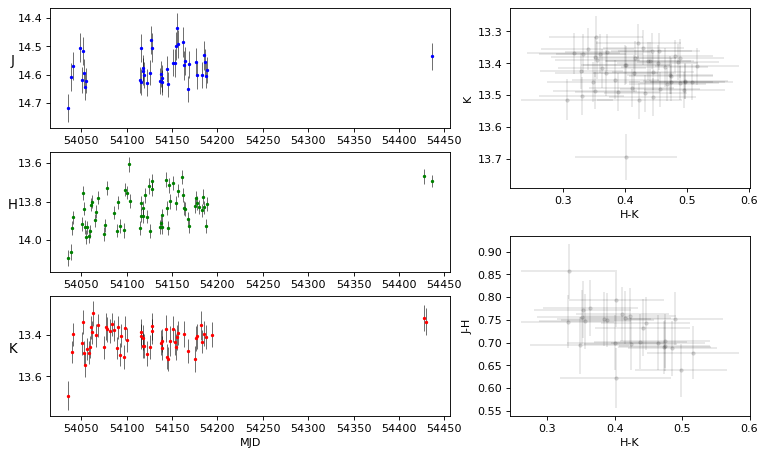

86 Robberto index #2938 is 44199508519309.
 Match: 0.16 arcsec
 Published mags: F139M=15.1
 Measured mags:  J=15.6, K=13.8
 Stetson variability index:  S=2.52
 


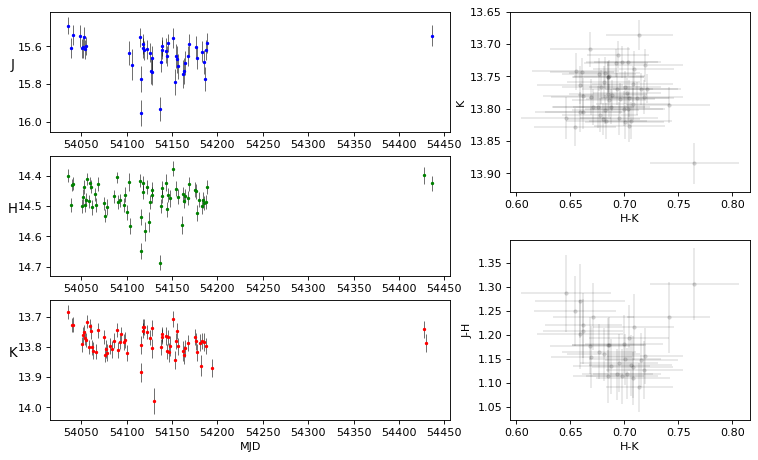

87 Robberto index #2939 is 44199508522733.
 Match: 0.11 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=15.1, K=12.8
 Stetson variability index:  S=1.24
 


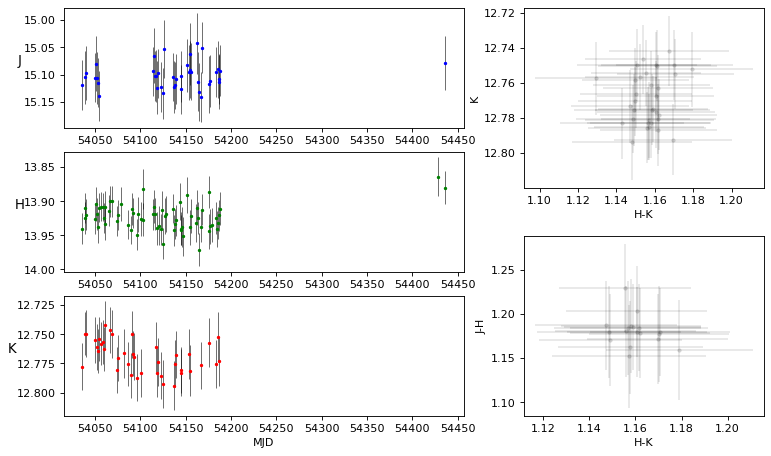

88 Robberto index #3067 is 44199508522810.
 Match: 0.12 arcsec
 Published mags: F139M=15.7
 Measured mags:  J=15.5, K=14.4
 Stetson variability index:  S=2.25
 


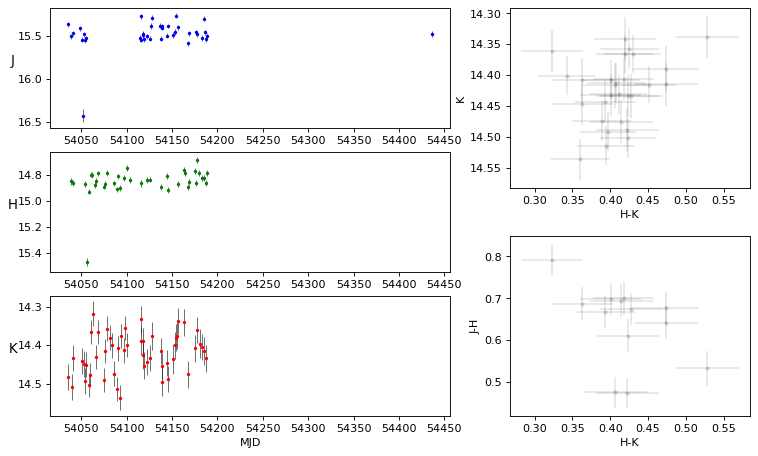

89 Robberto index #3164 is 44199508561967.
 Match: 0.15 arcsec
 Published mags: F139M=15.9
 Measured mags:  J=15.7, K=14.6
 Stetson variability index:  S=1.79
 


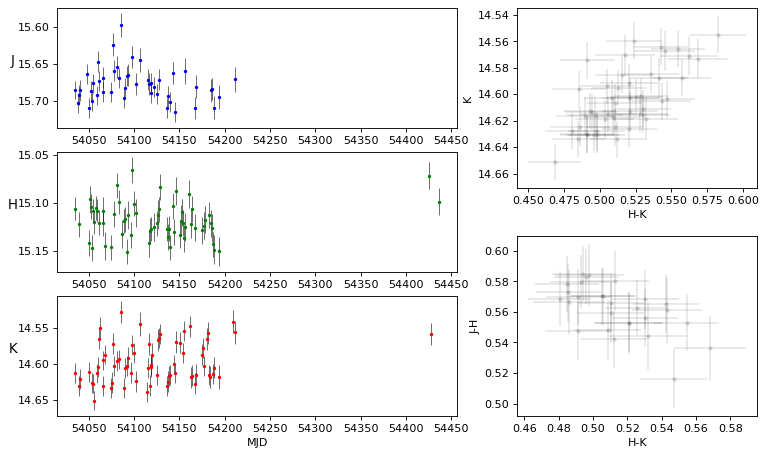

90 Robberto index #3233 is 44199508520041.
 Match: 0.02 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.6, K=13.4
 Stetson variability index:  S=3.77
 


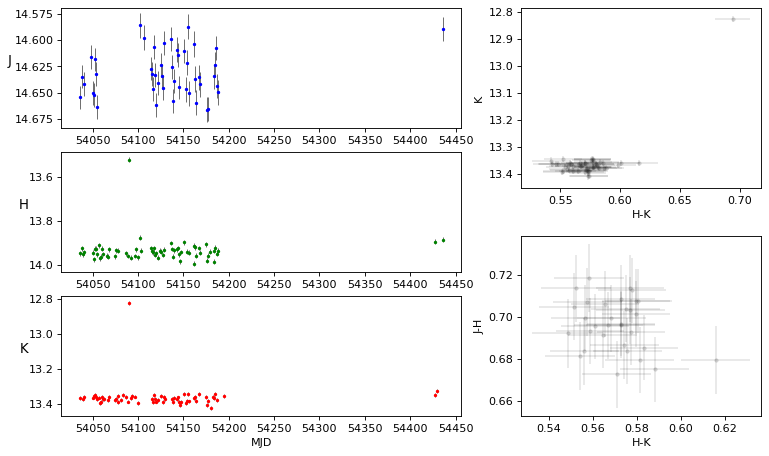

91 Robberto index #3293 is 44199508561054.
 Match: 0.05 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.8, K=13.4
 Stetson variability index:  S=1.13
 


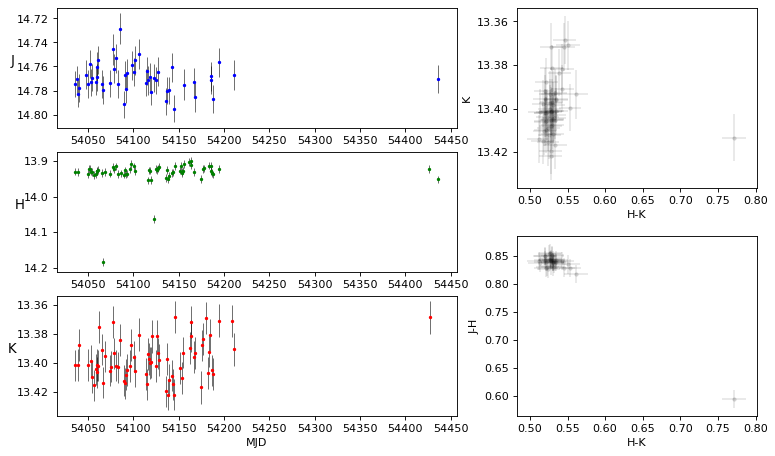

92 Robberto index #3294 is 44199508561033.
 Match: 0.06 arcsec
 Published mags: F139M=15.4
 Measured mags:  J=15.4, K=14.0
 Stetson variability index:  S=2.37
 


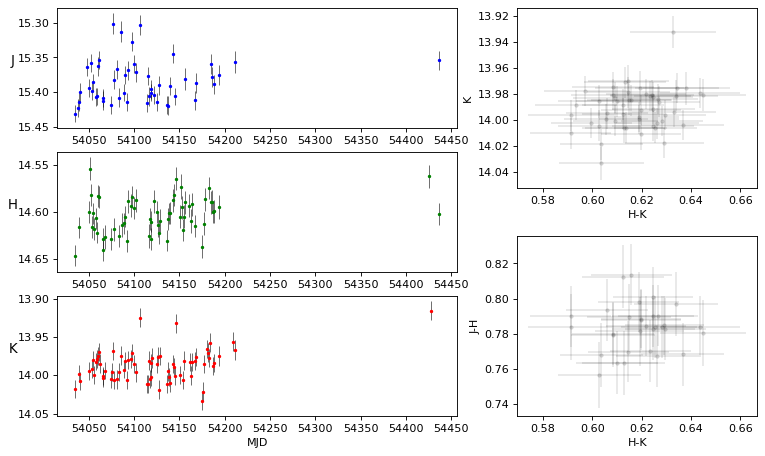

93 Robberto index #3375 is 44199508520145.
 Match: 0.04 arcsec
 Published mags: F139M=14.4
 Measured mags:  J=14.4, K=13.0
 Stetson variability index:  S=1.06
 


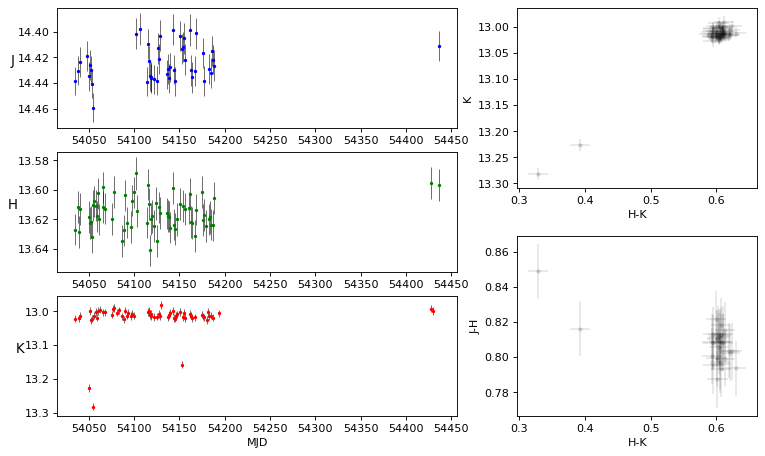

94 Robberto index #3382 is 44199508520070.
 Match: 0.01 arcsec
 Published mags: F139M=16.9
 Measured mags:  J=16.7, K=15.2
 Stetson variability index:  S=0.98
 


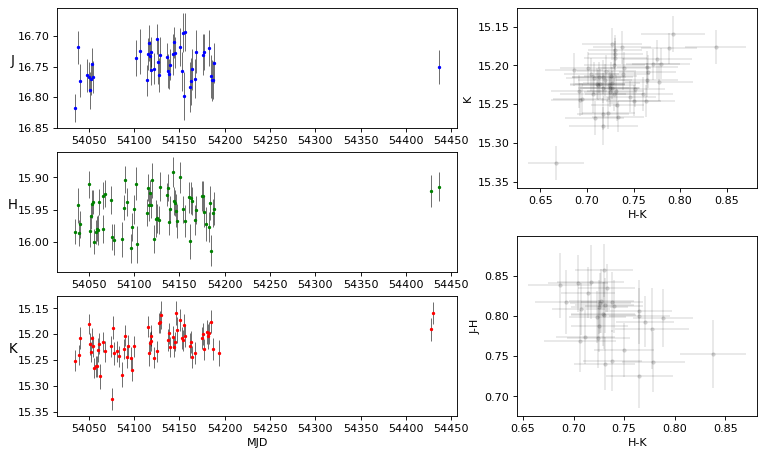

95 Robberto index #3383 is 44199508520080.
 Match: 0.01 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=15.3
 Stetson variability index:  S=0.03
 


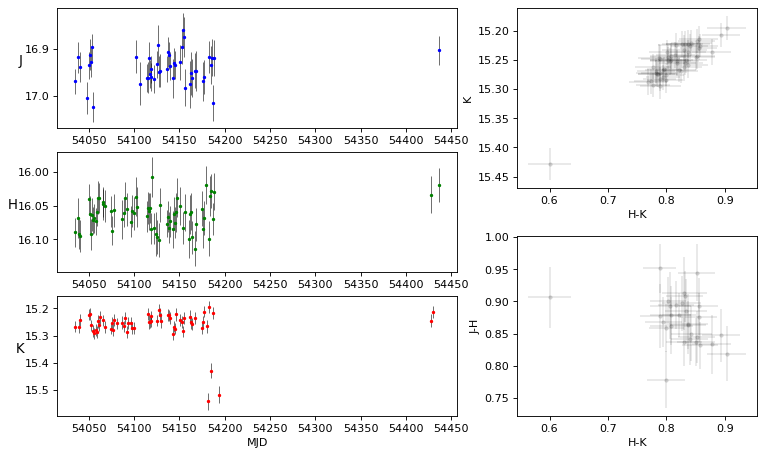

96 Robberto index #3389 is 44199508520297.
 Match: 0.04 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.8, K=13.4
 Stetson variability index:  S=5.07
 


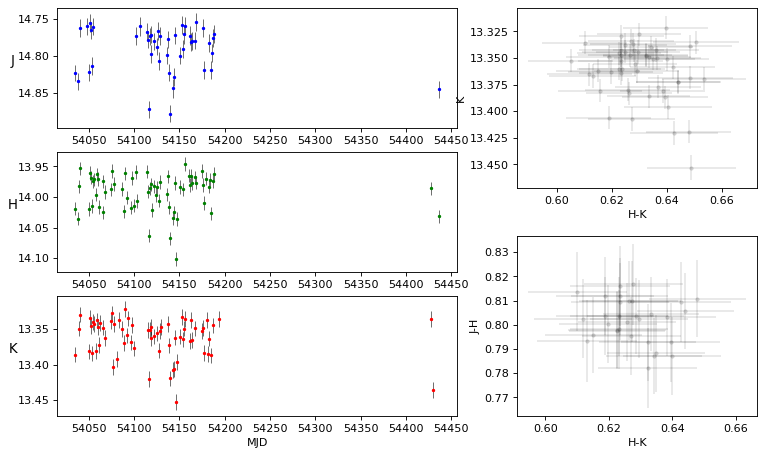

97 Robberto index #3391 is 44199508520280.
 Match: 0.03 arcsec
 Published mags: F139M=15.3
 Measured mags:  J=15.1, K=13.9
 Stetson variability index:  S=2.20
 


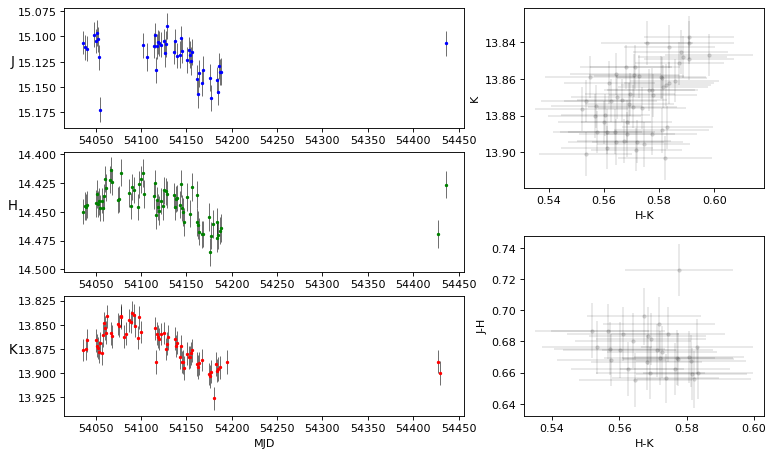

98 Robberto index #3544 is 44199508520265.
 Match: 0.09 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.6, K=13.7
 Stetson variability index:  S=1.18
 


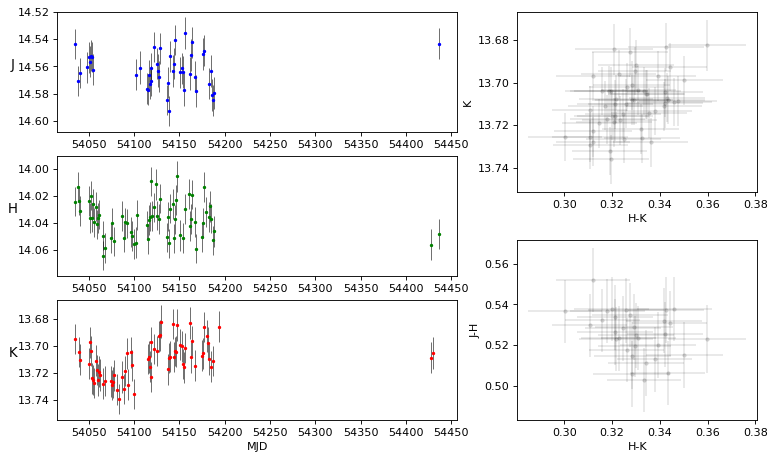

99 Robberto index #3679 is 44199508471300.
 Match: 0.14 arcsec
 Published mags: F139M=15.0
 Measured mags:  J=15.0, K=13.9
 Stetson variability index:  S=3.93
 


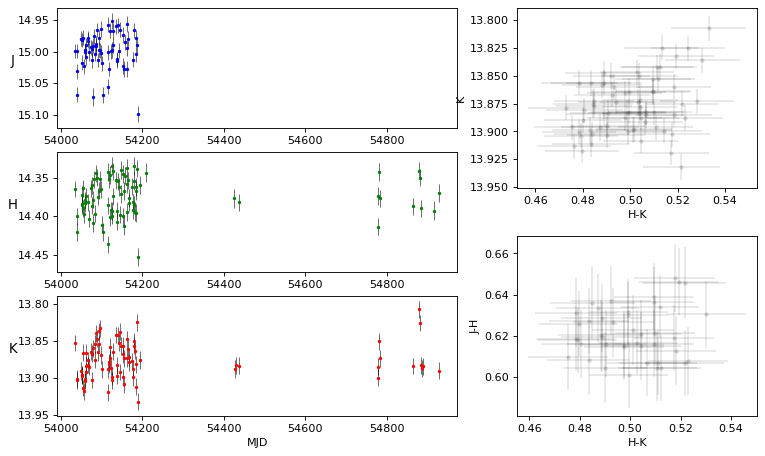

100 Robberto index #3701 is 44199508471513.
 Match: 0.06 arcsec
 Published mags: F139M=13.3
 Measured mags:  J=13.1, K=12.1
 Stetson variability index:  S=3.26
 


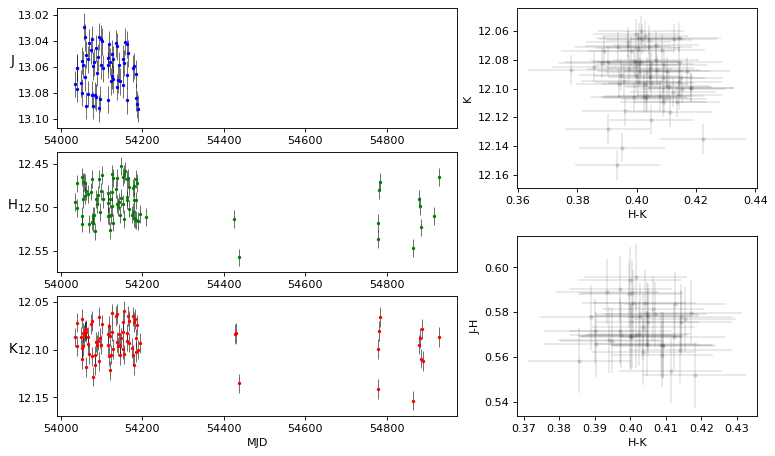

101 Robberto index #3787 is 44199508470578.
 Match: 0.14 arcsec
 Published mags: F139M=15.9
 Measured mags:  J=15.7, K=14.6
 Stetson variability index:  S=1.51
 


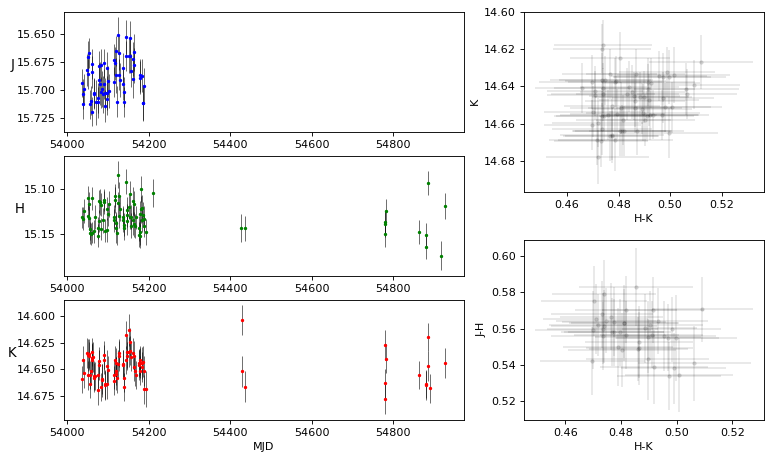

102 Robberto index #3833 is 44199508512290.
 Match: 0.15 arcsec
 Published mags: F139M=17.8
 Measured mags:  J=17.7, K=16.2
 Stetson variability index:  S=0.48
 


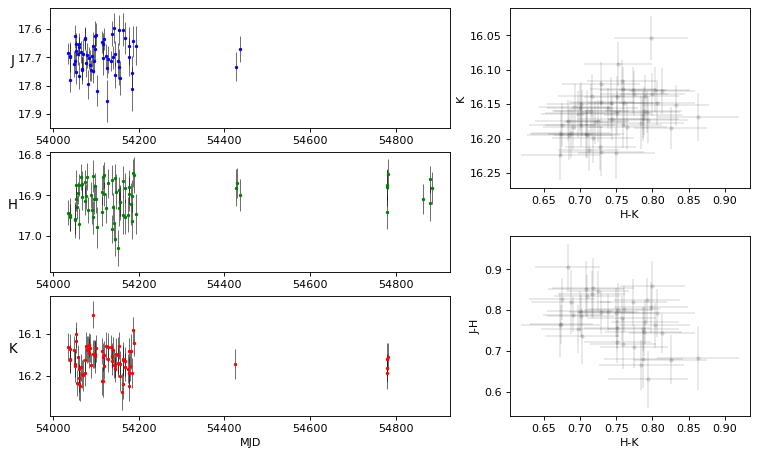

103 Robberto index #3882 is 44199508513099.
 Match: 0.04 arcsec
 Published mags: F139M=17.6
 Measured mags:  J=17.5, K=16.2
 Stetson variability index:  S=0.02
 


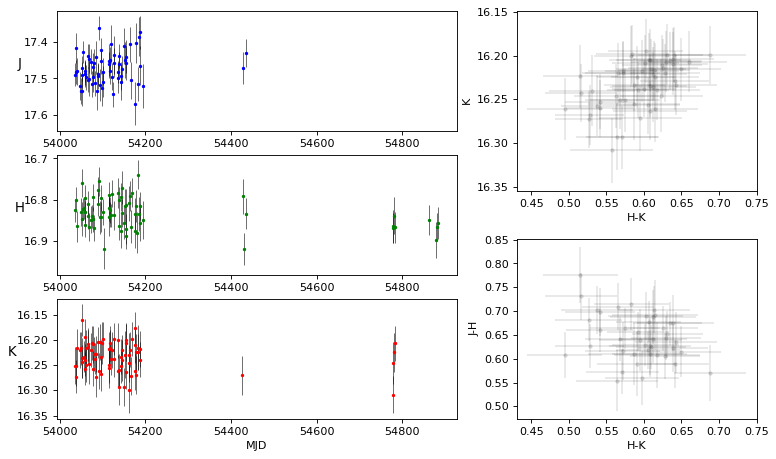

104 Robberto index #3945 is 44199508513873.
 Match: 0.04 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.6, K=13.7
 Stetson variability index:  S=0.48
 


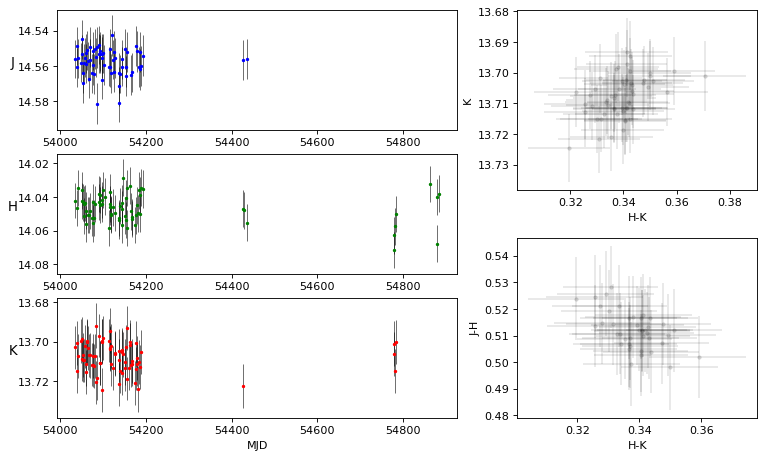

105 Robberto index #3963 is 44199508514298.
 Match: 0.10 arcsec
 Published mags: F139M=14.5
 Measured mags:  J=14.4, K=13.4
 Stetson variability index:  S=0.73
 


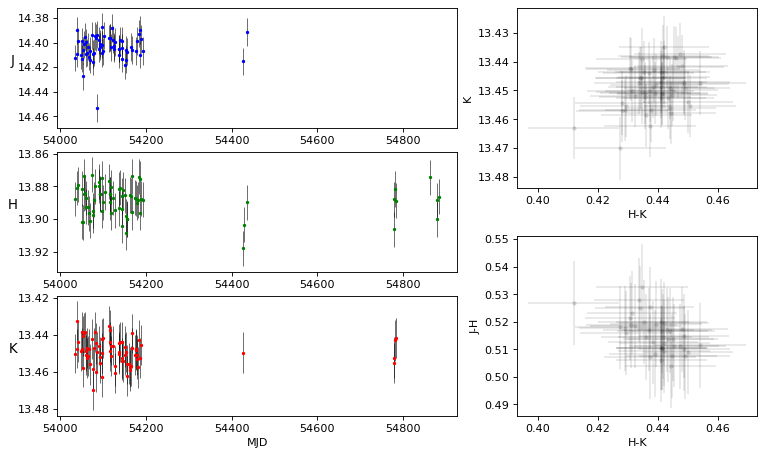

106 Robberto index #4031 is 44199508471420.
 Match: 0.04 arcsec
 Published mags: F139M=14.8
 Measured mags:  J=14.8, K=13.9
 Stetson variability index:  S=0.39
 


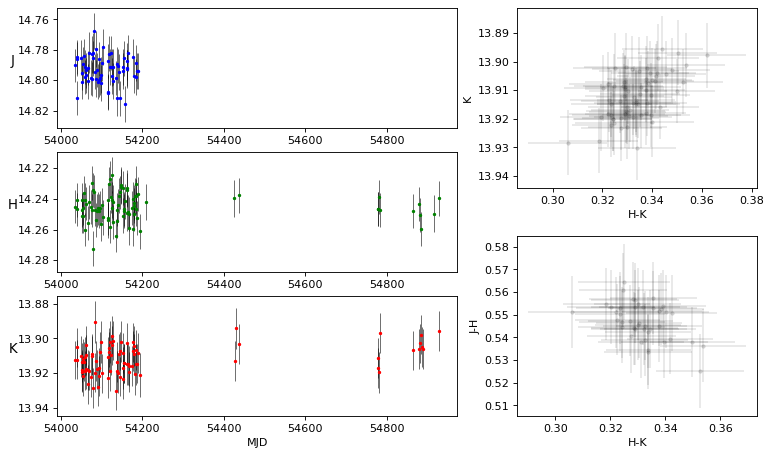

107 Robberto index #4033 is 44199508471453.
 Match: 0.03 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=15.7
 Stetson variability index:  S=0.94
 


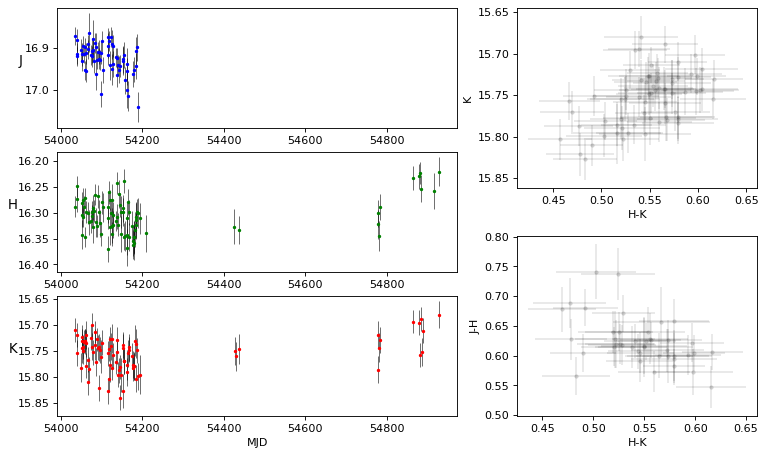

108 Robberto index #4130 is 44199508511871.
 Match: 0.02 arcsec
 Published mags: F139M=12.9
 Measured mags:  J=12.7, K=11.8
 Stetson variability index:  S=2.11
 


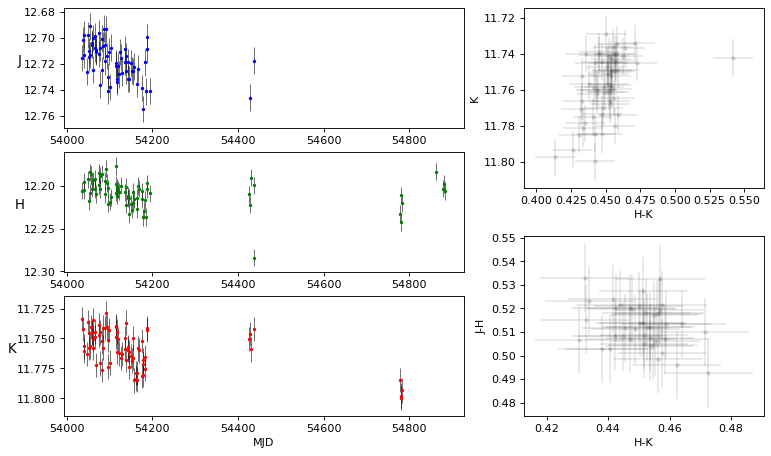

109 Robberto index #4135 is 44199508511927.
 Match: 0.05 arcsec
 Published mags: F139M=15.1
 Measured mags:  J=14.8, K=13.6
 Stetson variability index:  S=6.72
 


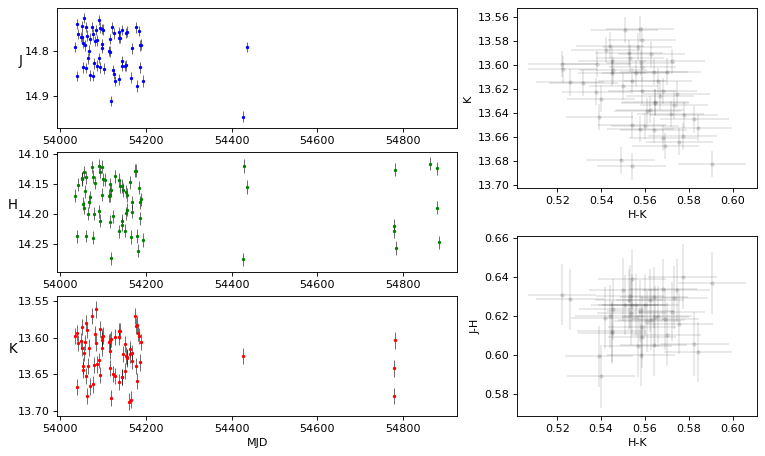

110 Robberto index #4136 is 44199508511884.
 Match: 0.04 arcsec
 Published mags: F139M=15.2
 Measured mags:  J=15.2, K=14.1
 Stetson variability index:  S=2.69
 


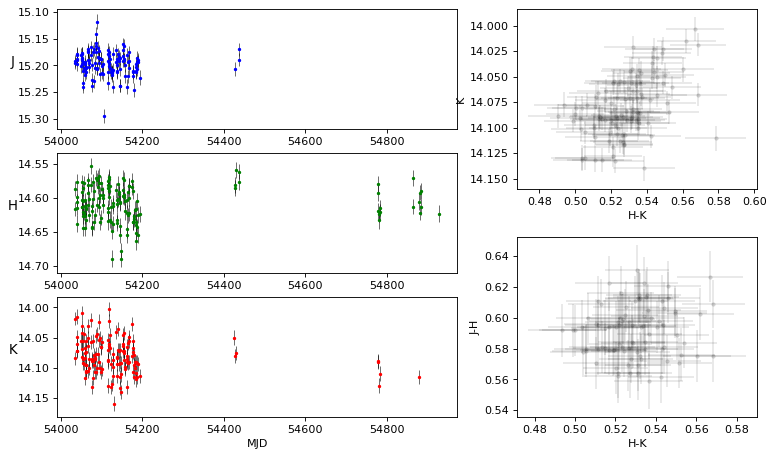

111 Robberto index #4138 is 44199508512072.
 Match: 0.07 arcsec
 Published mags: F139M=15.8
 Measured mags:  J=15.7, K=14.7
 Stetson variability index:  S=0.64
 


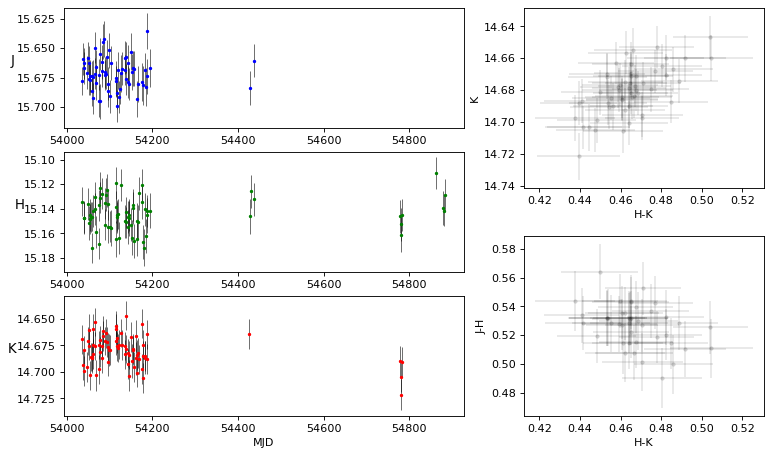

112 Robberto index #4139 is 44199508511903.
 Match: 0.04 arcsec
 Published mags: F139M=15.9
 Measured mags:  J=15.8, K=14.7
 Stetson variability index:  S=1.91
 


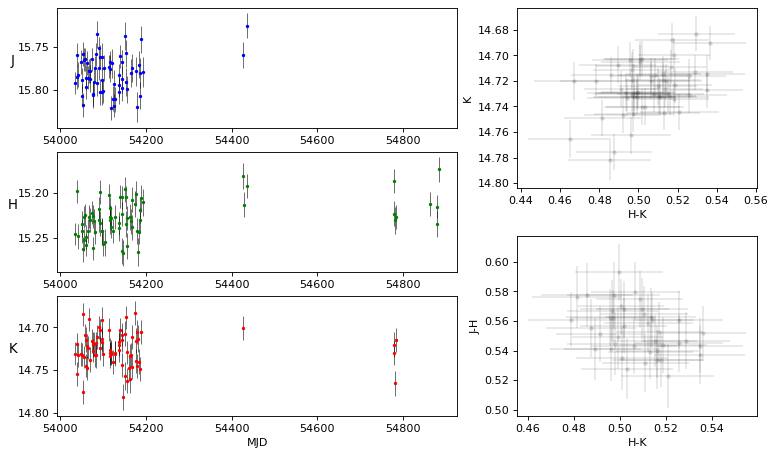

113 Robberto index #4251 is 44199508564948.
 Match: 0.15 arcsec
 Published mags: F139M=17.0
 Measured mags:  J=16.9, K=15.8
 Stetson variability index:  S=0.20
 


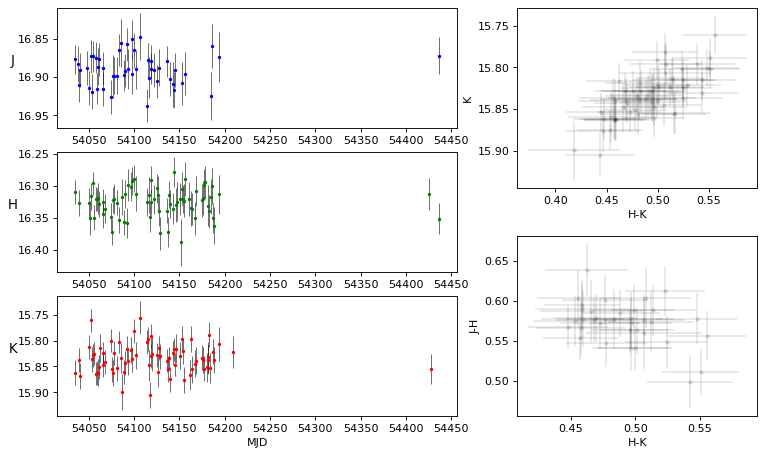

114 Robberto index #4280 is 44199508544310.
 Match: 0.14 arcsec
 Published mags: F139M=14.7
 Measured mags:  J=14.8, K=13.9
 Stetson variability index:  S=1.07
 


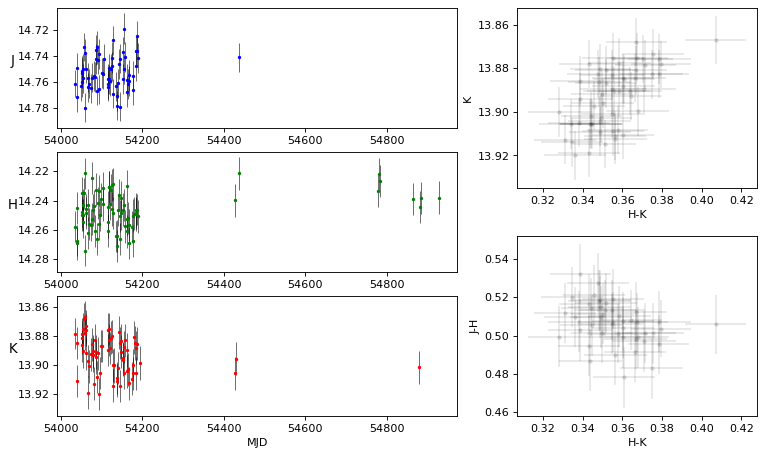

115 Robberto index #4286 is 44199508543835.
 Match: 0.25 arcsec
 Published mags: F139M=16.1
 Measured mags:  J=16.0, K=14.9
 Stetson variability index:  S=1.76
 


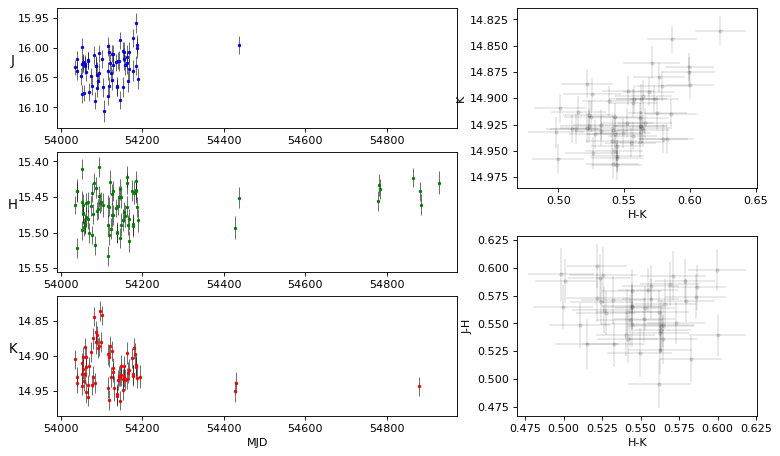

116 Robberto index #4326 is 44199508512349.
 Match: 0.05 arcsec
 Published mags: F139M=14.6
 Measured mags:  J=14.6, K=13.3
 Stetson variability index:  S=3.76
 


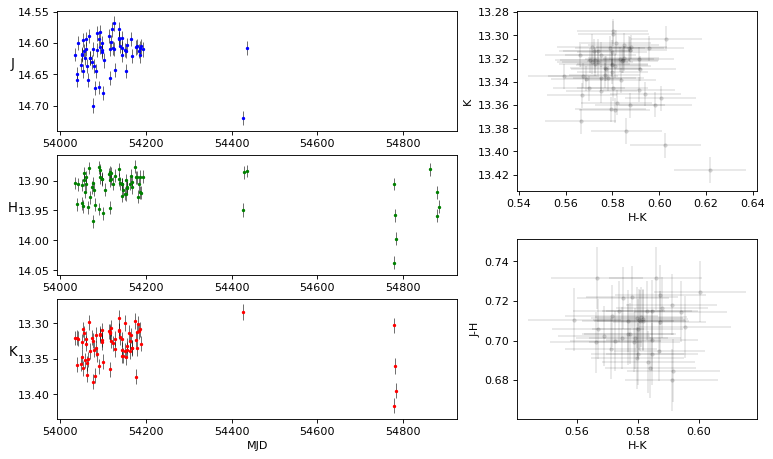

117 Robberto index #4434 is 44199508565550.
 Match: 0.16 arcsec
 Published mags: F139M=14.9
 Measured mags:  J=15.0, K=14.1
 Stetson variability index:  S=0.83
 


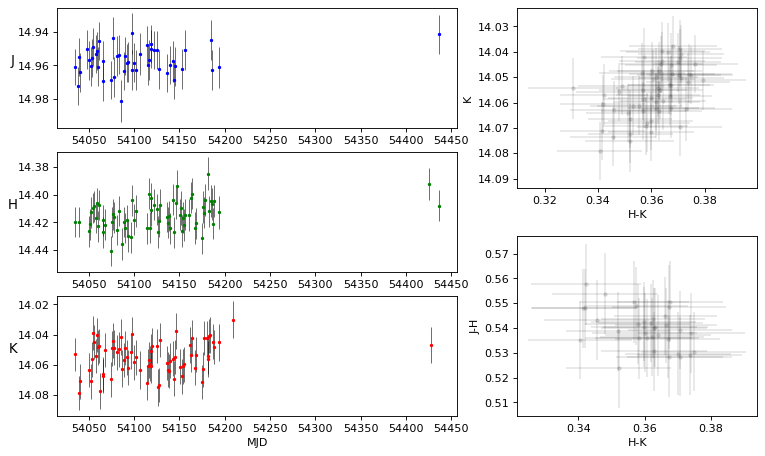

118 Robberto index #4495 is 44199508565969.
 Match: 0.17 arcsec
 Published mags: F139M=19.3
 Measured mags:  J=nan, K=18.4
 Stetson variability index:  S=nan
 


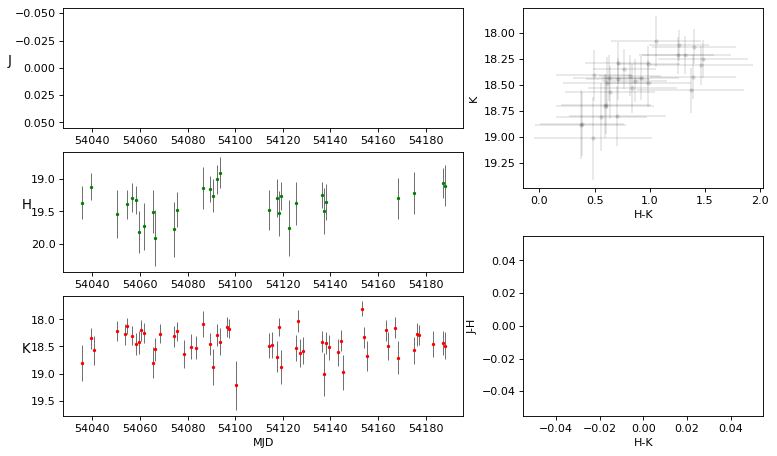

In [177]:
bd_match_sids = matches.index

for i, sid in enumerate(bd_match_sids):
    
    print(f"{i} Robberto index #{matched_bds['index'][i]} is {sid}.")
    print(f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    print(f" Published mags: F139M={matched_bds['mag139'][i]:.1f}")
    print(f" Measured mags:  J={matches['JAPERMAG3'].values[i]:.1f}, K={matches['KAPERMAG3'].values[i]:.1f}")
    print(f" Stetson variability index:  S={spread['variability']['Stetson_JHK'].values[idx[sep_constraint][i]]:.2f}")
    print(" ")

    fig_lc = simple_lc(dat, sid)
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    plt.show()
#     if i>10:
#         break
#     plt.savefig(f"Scholz_match_LCs/{i}_{table['ID'][i]}_{w7m.index[idx[i]]}")

